#STEP 1 = Import Libraries

In [ ]:
# To handle tabular data
import numpy as np    
import pandas as pd

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical plots and analysis
!pip install scikit-plot
import scikitplot as skplt
from scipy.stats import shapiro

# To divide into a test, train, and scale the variables 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# For basic feature selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
!pip install feature-engine
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.selection import (
    DropConstantFeatures,
    DropDuplicateFeatures,
    SmartCorrelatedSelection,
)

# For embedded feature selection and creating a random forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 6.9 MB/s eta 0:00:00


# STEP 2 = Import Data

In [ ]:
# Mount Google drive to access data and save files
from google.colab import drive
drive.mount("/content/gdrive")

# Filepath to the folder in Google drive for accessing and saving files
file_path = "/content/gdrive/MyDrive/Github/AI_Chapter"

Mounted at /content/gdrive


In [ ]:
# Create a dataframe
index_column = "Part_#"
df = pd.read_csv(file_path+"/data/DATA.csv", index_col=index_column)

In [ ]:
# Check if the dataframe was created correctly
df.head(5)

Age     Sex ETHY  FTGE  FVR  MYAL  ARTH  EM  CGTYD  FLUS  ...    CA  \
Part_#                                                            ...         
94754    30    Male  W/C     1    0     1     0   0      1     0  ...  10.0   
94968    20  Female  W/C     1    0     0     1   0      1     0  ...   9.0   
72548    51  Female  W/C     1    0     0     1   0      0     0  ...   NaN   
95837    50    Male  W/C     1    1     1     1   1      1     0  ...  10.0   
97534    27  Female  W/C     1    0     0     0   1      1     0  ...   9.0   

          P     FE  C-RPRO  TCHOL     NA    K     CL  CONFLYME  LYME  
Part_#                                                                
94754   4.0  146.0     1.0    6.0  142.0  4.0  102.0         1     1  
94968   4.0  136.0     0.0    4.0  139.0  4.0  102.0         3     1  
72548   NaN    NaN     NaN    NaN    NaN  NaN    NaN         1     1  
95837   3.0  143.0     1.0    4.0  141.0  4.0  106.0         3     1  
97534   4.0  116.0     4.0    5.0  141.0  4.0  103.0         3     1  

[5 rows x 64 columns]

In [ ]:
# Check the shape and entries of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 94754 to 30499
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       122 non-null    int64  
 1   Sex       122 non-null    object 
 2   ETHY      122 non-null    object 
 3   FTGE      122 non-null    int64  
 4   FVR       122 non-null    int64  
 5   MYAL      122 non-null    int64  
 6   ARTH      122 non-null    int64  
 7   EM        122 non-null    int64  
 8   CGTYD     122 non-null    int64  
 9   FLUS      122 non-null    int64  
 10  HDCH      122 non-null    int64  
 11  WBC       119 non-null    float64
 12  NEUTRO    119 non-null    float64
 13  LYMPH     119 non-null    float64
 14  MONOC     119 non-null    float64
 15  EOSIN     119 non-null    float64
 16  BASOP     119 non-null    float64
 17  NEUTRO%   119 non-null    float64
 18  LYMPH%    119 non-null    float64
 19  MONOC%    119 non-null    float64
 20  EOSIN%    119 non-null    

In [ ]:
# Get basic statistics for each column in the dataframe
df.describe()

Age        FTGE         FVR        MYAL        ARTH          EM  \
count  122.000000  122.000000  122.000000  122.000000  122.000000  122.000000   
mean    49.278689    0.532787    0.081967    0.327869    0.434426    0.040984   
std     16.696247    0.500981    0.275446    0.471373    0.497725    0.199070   
min     16.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     35.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     52.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
75%     61.000000    1.000000    0.000000    1.000000    1.000000    0.000000   
max     87.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            CGTYD        FLUS        HDCH         WBC  ...          CA  \
count  122.000000  122.000000  122.000000  119.000000  ...  118.000000   
mean     0.270492    0.049180    0.286885    5.394958  ...    9.737288   
std      0.446046    0.217136    0.454173    3.800576  ...    0.513543   
min      0.000000    0.000000    0.000000    2.000000  ...    8.000000   
25%      0.000000    0.000000    0.000000    4.000000  ...    9.000000   
50%      0.000000    0.000000    0.000000    5.000000  ...   10.000000   
75%      1.000000    0.000000    1.000000    6.000000  ...   10.000000   
max      1.000000    1.000000    1.000000   43.000000  ...   11.000000   

                P          FE      C-RPRO       TCHOL          NA           K  \
count  118.000000  118.000000  118.000000  118.000000  118.000000  118.000000   
mean     4.000000  102.822034    2.508475    3.720339  141.474576    4.271186   
std      0.627027   35.023956    4.394530    1.376764    1.856897    0.465218   
min      3.000000   32.000000    0.000000    1.000000  134.000000    4.000000   
25%      4.000000   78.250000    1.000000    3.000000  141.000000    4.000000   
50%      4.000000  102.000000    1.000000    3.000000  142.000000    4.000000   
75%      4.000000  123.000000    2.000000    4.000000  143.000000    5.000000   
max      6.000000  200.000000   29.000000    9.000000  145.000000    6.000000   

               CL    CONFLYME        LYME  
count  118.000000  122.000000  122.000000  
mean   103.033898    3.081967    0.426230  
std      2.260520    1.243762    0.496567  
min     95.000000    1.000000    0.000000  
25%    102.000000    2.000000    0.000000  
50%    103.000000    4.000000    0.000000  
75%    104.000000    4.000000    1.000000  
max    111.000000    4.000000    1.000000  

[8 rows x 62 columns]

In [ ]:
# Creating a function to tabulate missing values from any dataframe
def missing_data(df):
  absolute_missing_values = df.isnull().sum()
  percentage_missing_values = round((df.isnull().sum()/len(df))*100,2)
  missing_data = pd.concat(objs=[absolute_missing_values,
                                 percentage_missing_values], axis=1,
                           keys=["Absolute missing values",
                                 "Percentage missing values"])
  return missing_data.sort_values(by=["Percentage missing values"],
                                  ascending=False)

In [ ]:
# Tabulate absolute missing values and percentage missing values from df
missing_data(df).head(30)

Absolute missing values  Percentage missing values
UREA                           5                       4.10
B.D.                           5                       4.10
GLUC                           4                       3.28
TRGLY                          4                       3.28
UREICN                         4                       3.28
CREAT                          4                       3.28
URICA                          4                       3.28
CHOL                           4                       3.28
HDL                            4                       3.28
VLDL                           4                       3.28
LDL                            4                       3.28
TTLPROT                        4                       3.28
GGT                            4                       3.28
ALB                            4                       3.28
GLOB                           4                       3.28
AGRAT                          4                       3.28
B.T.                           4                       3.28
B.I.                           4                       3.28
AST                            4                       3.28
ALT                            4                       3.28
LDH                            4                       3.28
ALKP                           4                       3.28
CL                             4                       3.28
K                              4                       3.28
NA                             4                       3.28
TCHOL                          4                       3.28
C-RPRO                         4                       3.28
FE                             4                       3.28
P                              4                       3.28
CA                             4                       3.28

## Figure 1

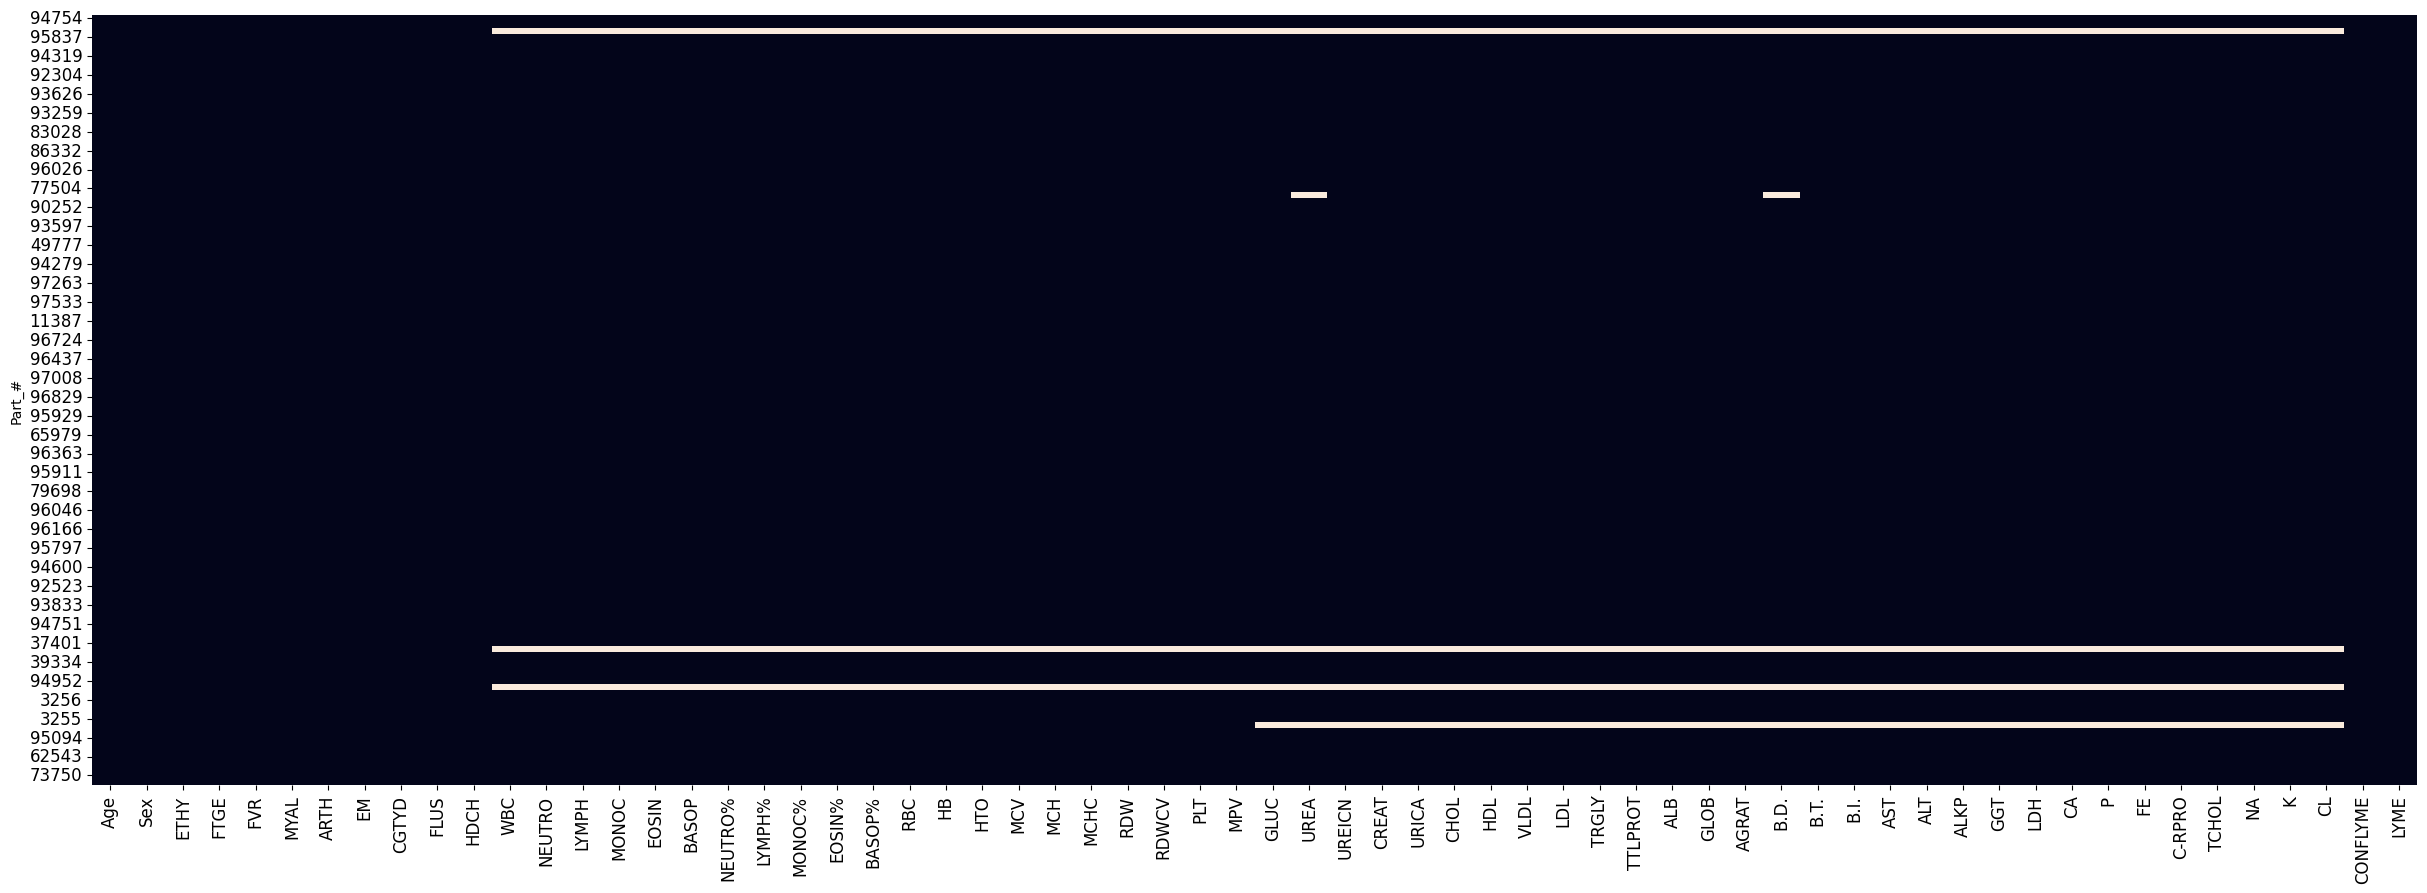

In [ ]:
# Visualize missing data in the dataframe
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(), cbar=False)

# Set font size for x and y axis ticks
plt.tick_params(axis="both", which="major", labelsize=12)

# Export the plot
plt.savefig(file_path+"/figures/Figure_1.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()

In [ ]:
# Creating a function to remove rows with values missing in more than one column
def filter_index(df):
  # Filter the index values with missing values in more than one column
  filtered_index = df[df.isna().sum(axis=1) > 2].index
  # Remove the filtered_index from the original dataframe (df)
  df = df.drop(index=filtered_index, inplace=True)
  # Return the filtered dataframe
  return df

In [ ]:
# Remove rows with missing values in more than one column from df
filter_index(df)

#STEP 3 = Exploratory data analysis

In [ ]:
# Count the number of specimens in the Lyme program
no_lyme = df["LYME"].value_counts()[0]
yes_lyme = df["LYME"].value_counts()[1]
print(f"Among the {len(df)} specimens in the dataframe.")
print(f"{no_lyme} patients did not participate in Lyme program (i.e. 0).")
print(f"The remaining {yes_lyme} participated in the Lyme program (i.e. 1).")

Among the 118 specimens in the dataframe.
67 patients did not participate in Lyme program (i.e. 0).
The remaining 51 participated in the Lyme program (i.e. 1).


##Figure 2

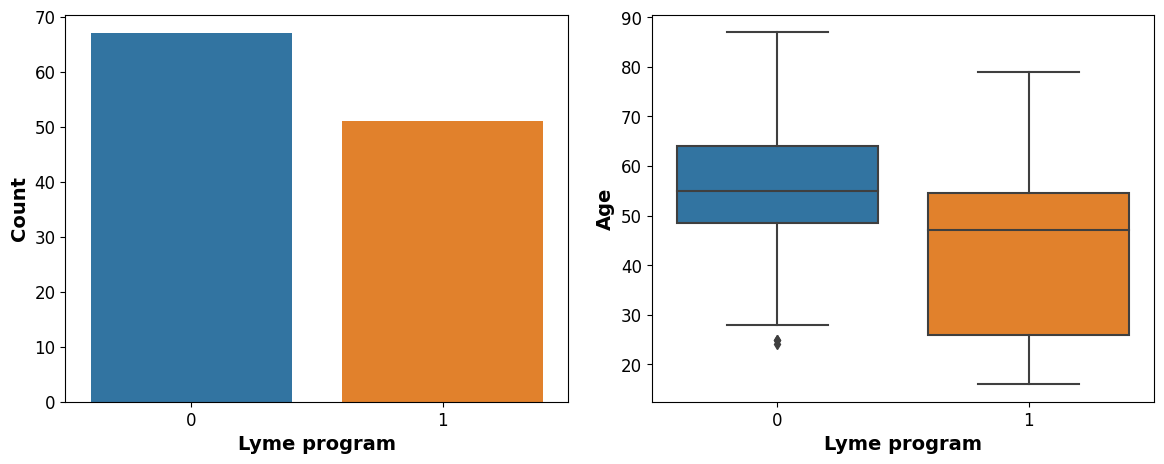

In [ ]:
# Creating a 1-Dimensional subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the number of specimens in Lyme program
sns.countplot(data=df, x="LYME", ax=axes[0])
sns.boxplot(data=df, x="LYME", y="Age", ax=axes[1])

# Set font size and weight for x and y axis labels
axes[0].set_xlabel("Lyme program", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Count", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Lyme program", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Age", fontsize=14, fontweight="bold")

# Set font size for axis ticks
axes[0].tick_params(axis="both", which="major", labelsize=12)
axes[1].tick_params(axis="both", which="major", labelsize=12)

# Adjust spacing between subplots
plt.tight_layout(pad=2)

# Export the plot
plt.savefig(file_path+"/figures/Figure_2.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()

##Figure 3

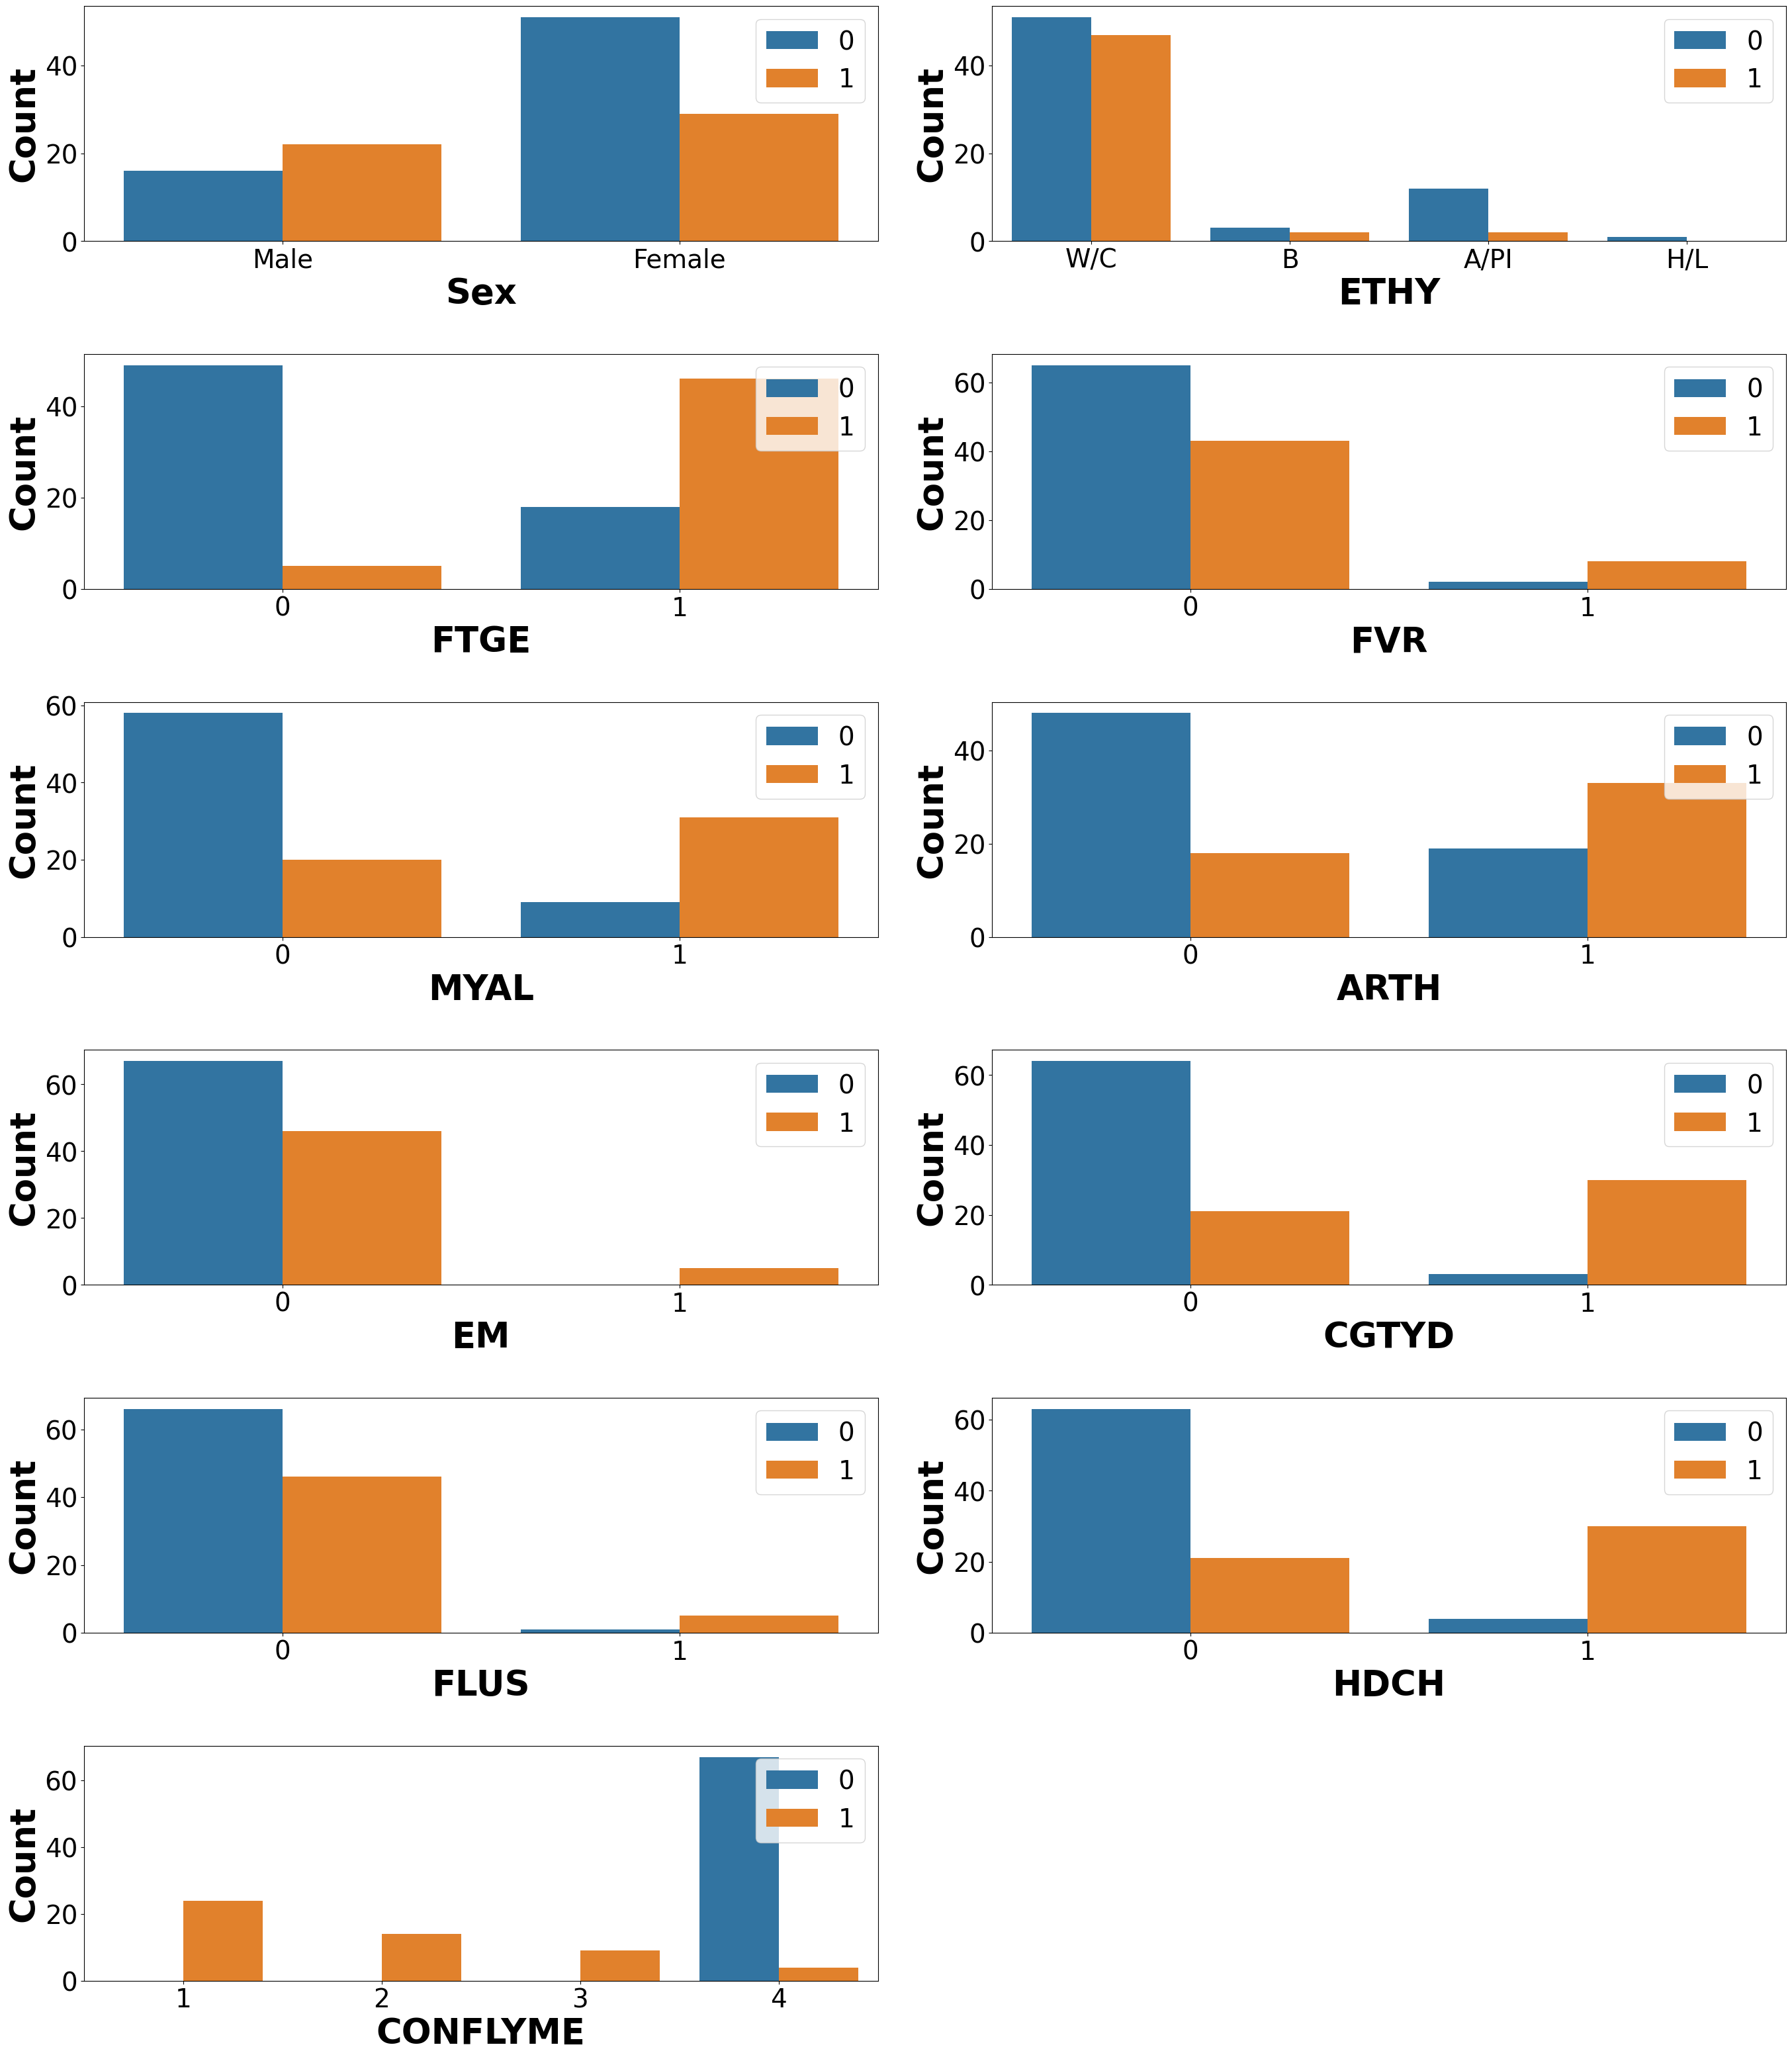

In [ ]:
### Visualize trends between categorical features and target variable (LYME) 
# List of columns
cols = ["Sex", "ETHY", "FTGE", "FVR", "MYAL", "ARTH", 
        "EM", "CGTYD", "FLUS", "HDCH", "CONFLYME"]

# Create subplots with 5 rows and 2 columns
fig, axes = plt.subplots(6, 2, figsize=(28, 32))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(cols):
    # Create countplot
    sns.countplot(data=df, x=col, hue="LYME", ax=axes[i])
    # Set legend position to "upper right"
    axes[i].legend(loc="upper right", fontsize=28)
    # Set x and y labels font size
    axes[i].set_xlabel(col, fontsize=38, fontweight="bold")
    axes[i].set_ylabel("Count", fontsize=38, fontweight="bold")
    # Set font size for x and y axis ticks
    axes[i].tick_params(axis="both", which="major", labelsize=28)

# Hide empty subplots
for i in range(len(cols), len(axes.flatten())):
    axes.flatten()[i].axis("off")

# Adjust spacing between subplots
plt.tight_layout(pad=4)

# Export the plot
plt.savefig(file_path+"/figures/Figure_3.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()

##Figure 4

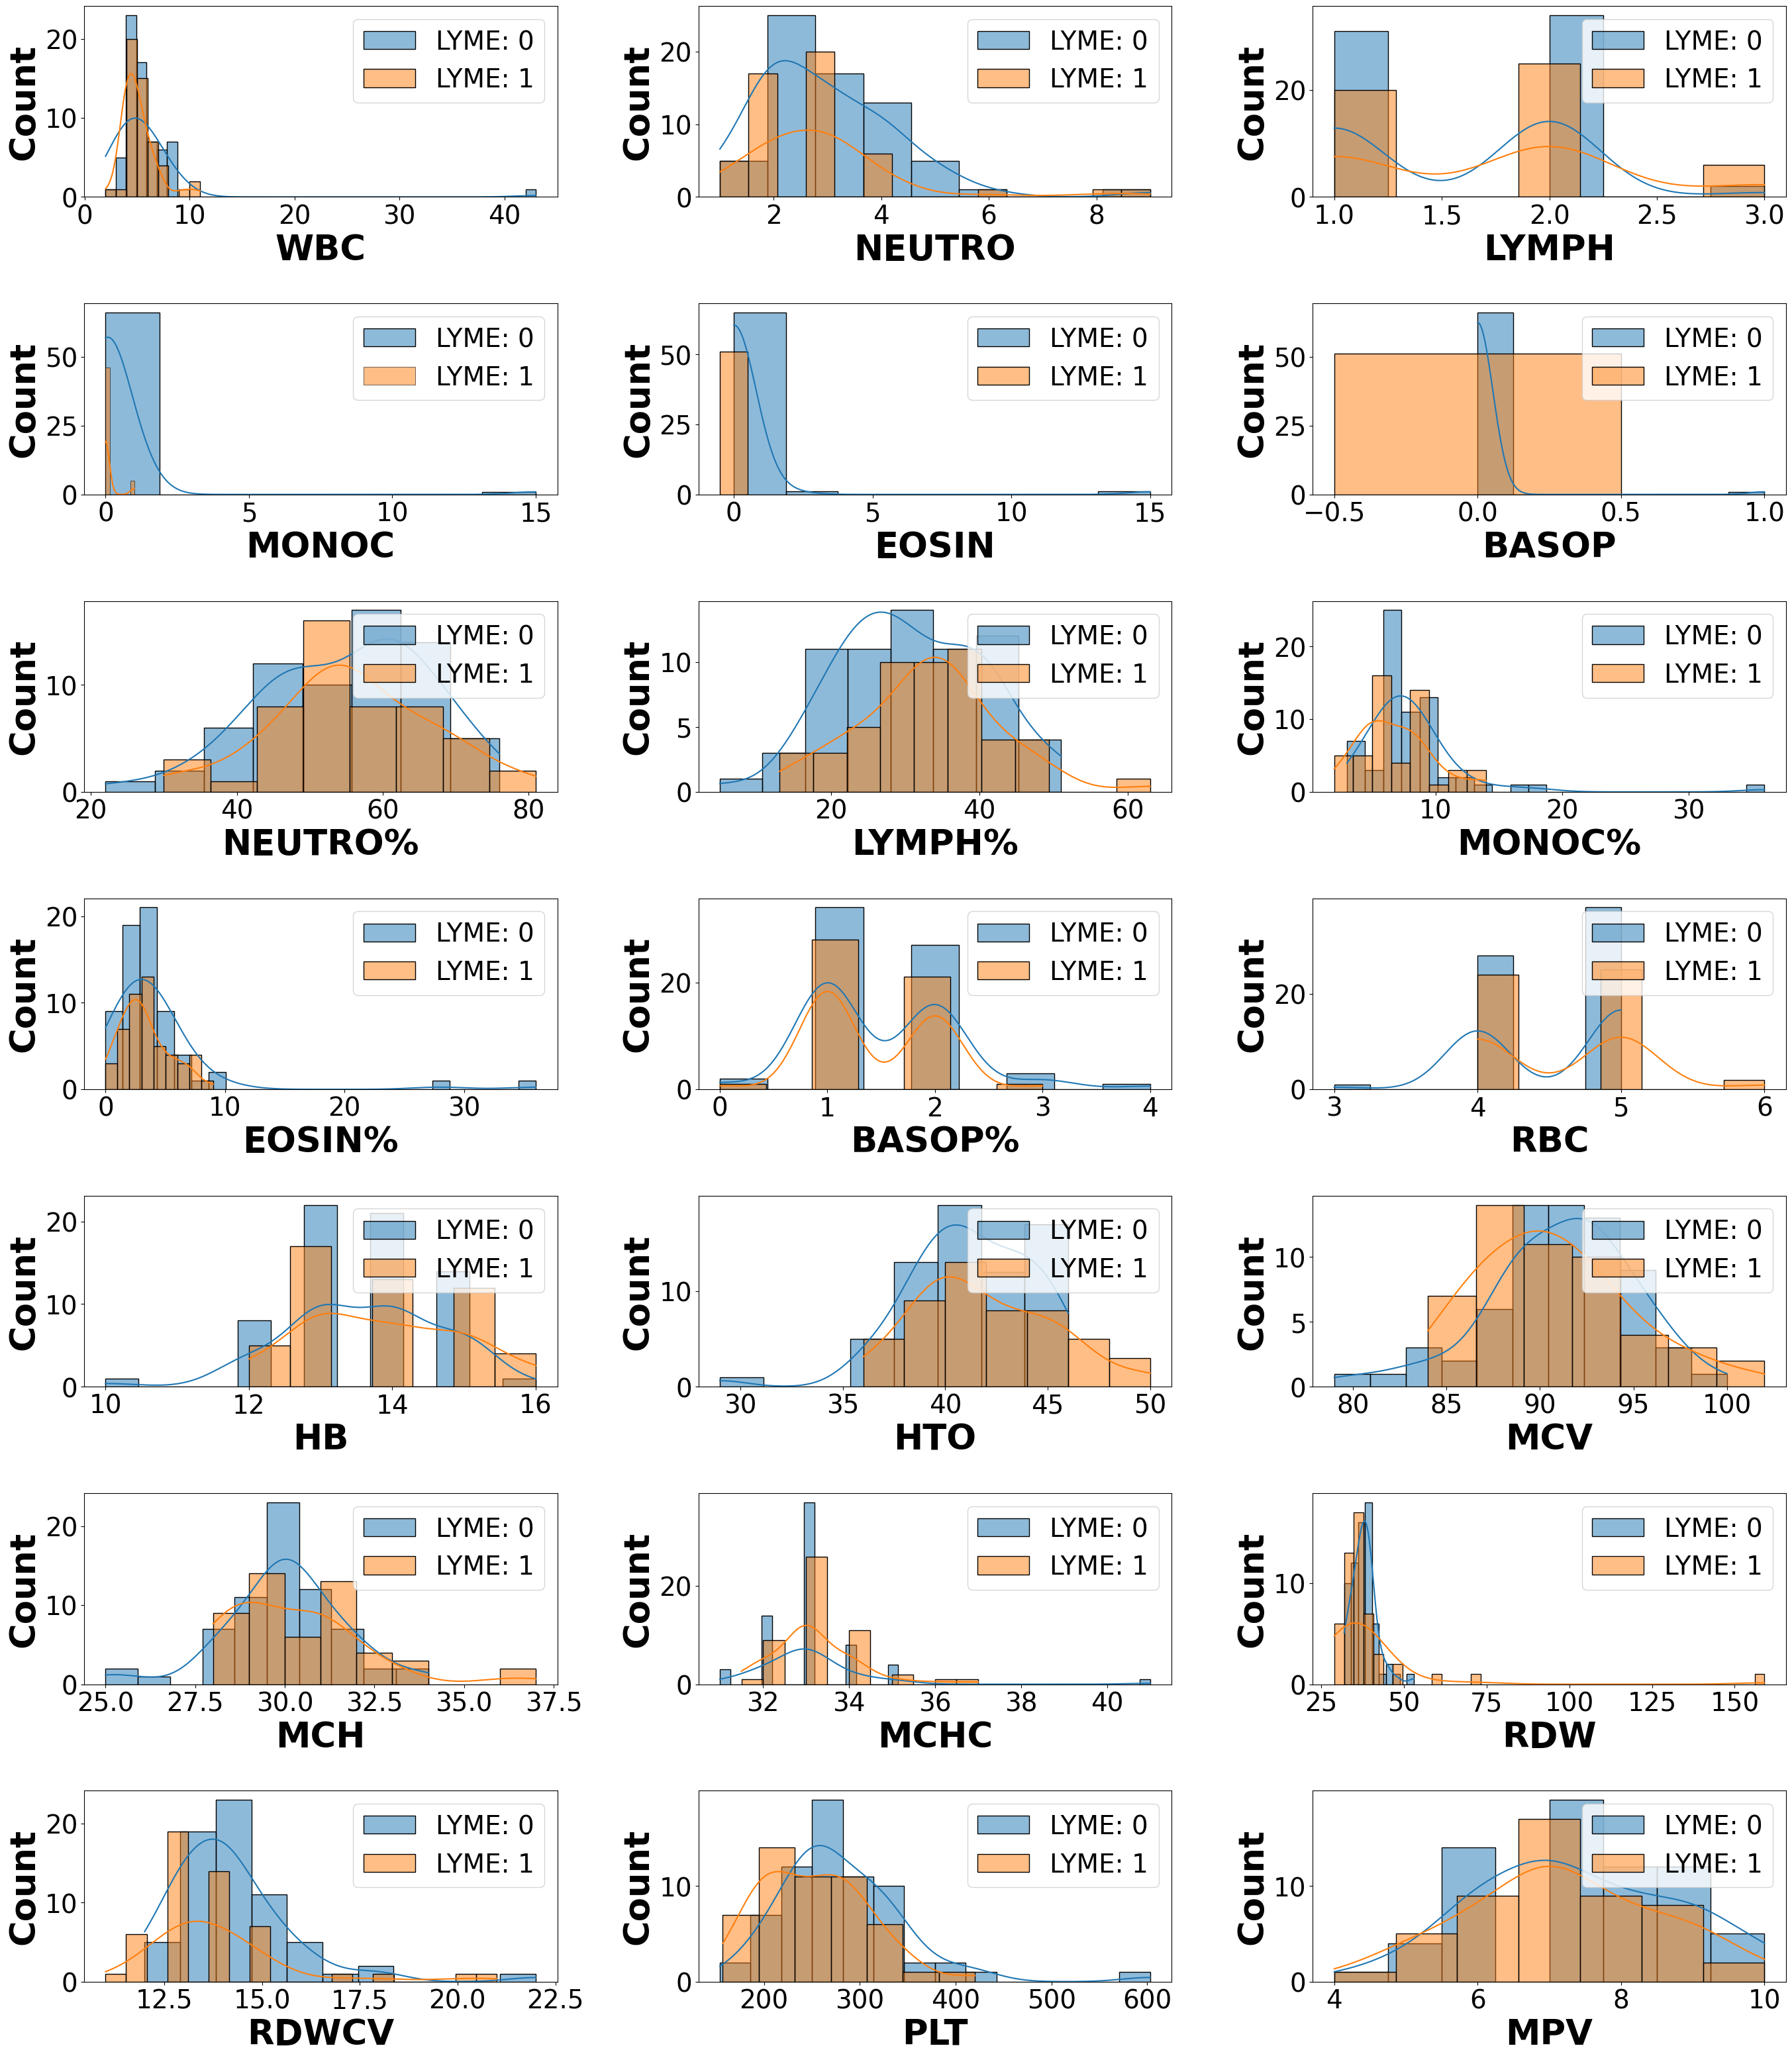

In [ ]:
### Visualize trends between blood count and LYME
# List of columns
cols = ["WBC", "NEUTRO", "LYMPH", "MONOC", "EOSIN", "BASOP", "NEUTRO%",
        "LYMPH%", "MONOC%", "EOSIN%", "BASOP%", "RBC", "HB", "HTO",
        "MCV", "MCH", "MCHC", "RDW", "RDWCV", "PLT", "MPV"]

# Calculate the number of rows and columns in the grid
num_cols = 3
num_rows = (len(cols) + num_cols - 1) // num_cols

# Create subplots with calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(28, 32))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through columns and create histplots for each category in LYME
for i, col in enumerate(cols):
  # Loop through unique categories in LYME in reverse order
  # to match the color scheme with countplots above
  for category in reversed(df["LYME"].unique()):
    # Create histplot for current category
    sns.histplot(data=df[df["LYME"] == category], x=col, kde=True, ax=axes[i],
                 label=f"LYME: {category}")
    # Set legend position to "upper right"
    axes[i].legend(loc="upper right", fontsize=28)
    # Set x and y labels font size
    axes[i].set_xlabel(col, fontsize=38, fontweight="bold")
    axes[i].set_ylabel("Count", fontsize=38, fontweight="bold")
    # Set font size for x and y axis ticks
    axes[i].tick_params(axis="both", which="major", labelsize=28)

# Hide empty subplots
for i in range(len(cols), len(axes.flatten())):
    axes.flatten()[i].axis("off")

# Adjust spacing between subplots
plt.tight_layout(pad=4)

# Export the plot
plt.savefig(file_path+"/figures/Figure_4.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()

##Figure 5

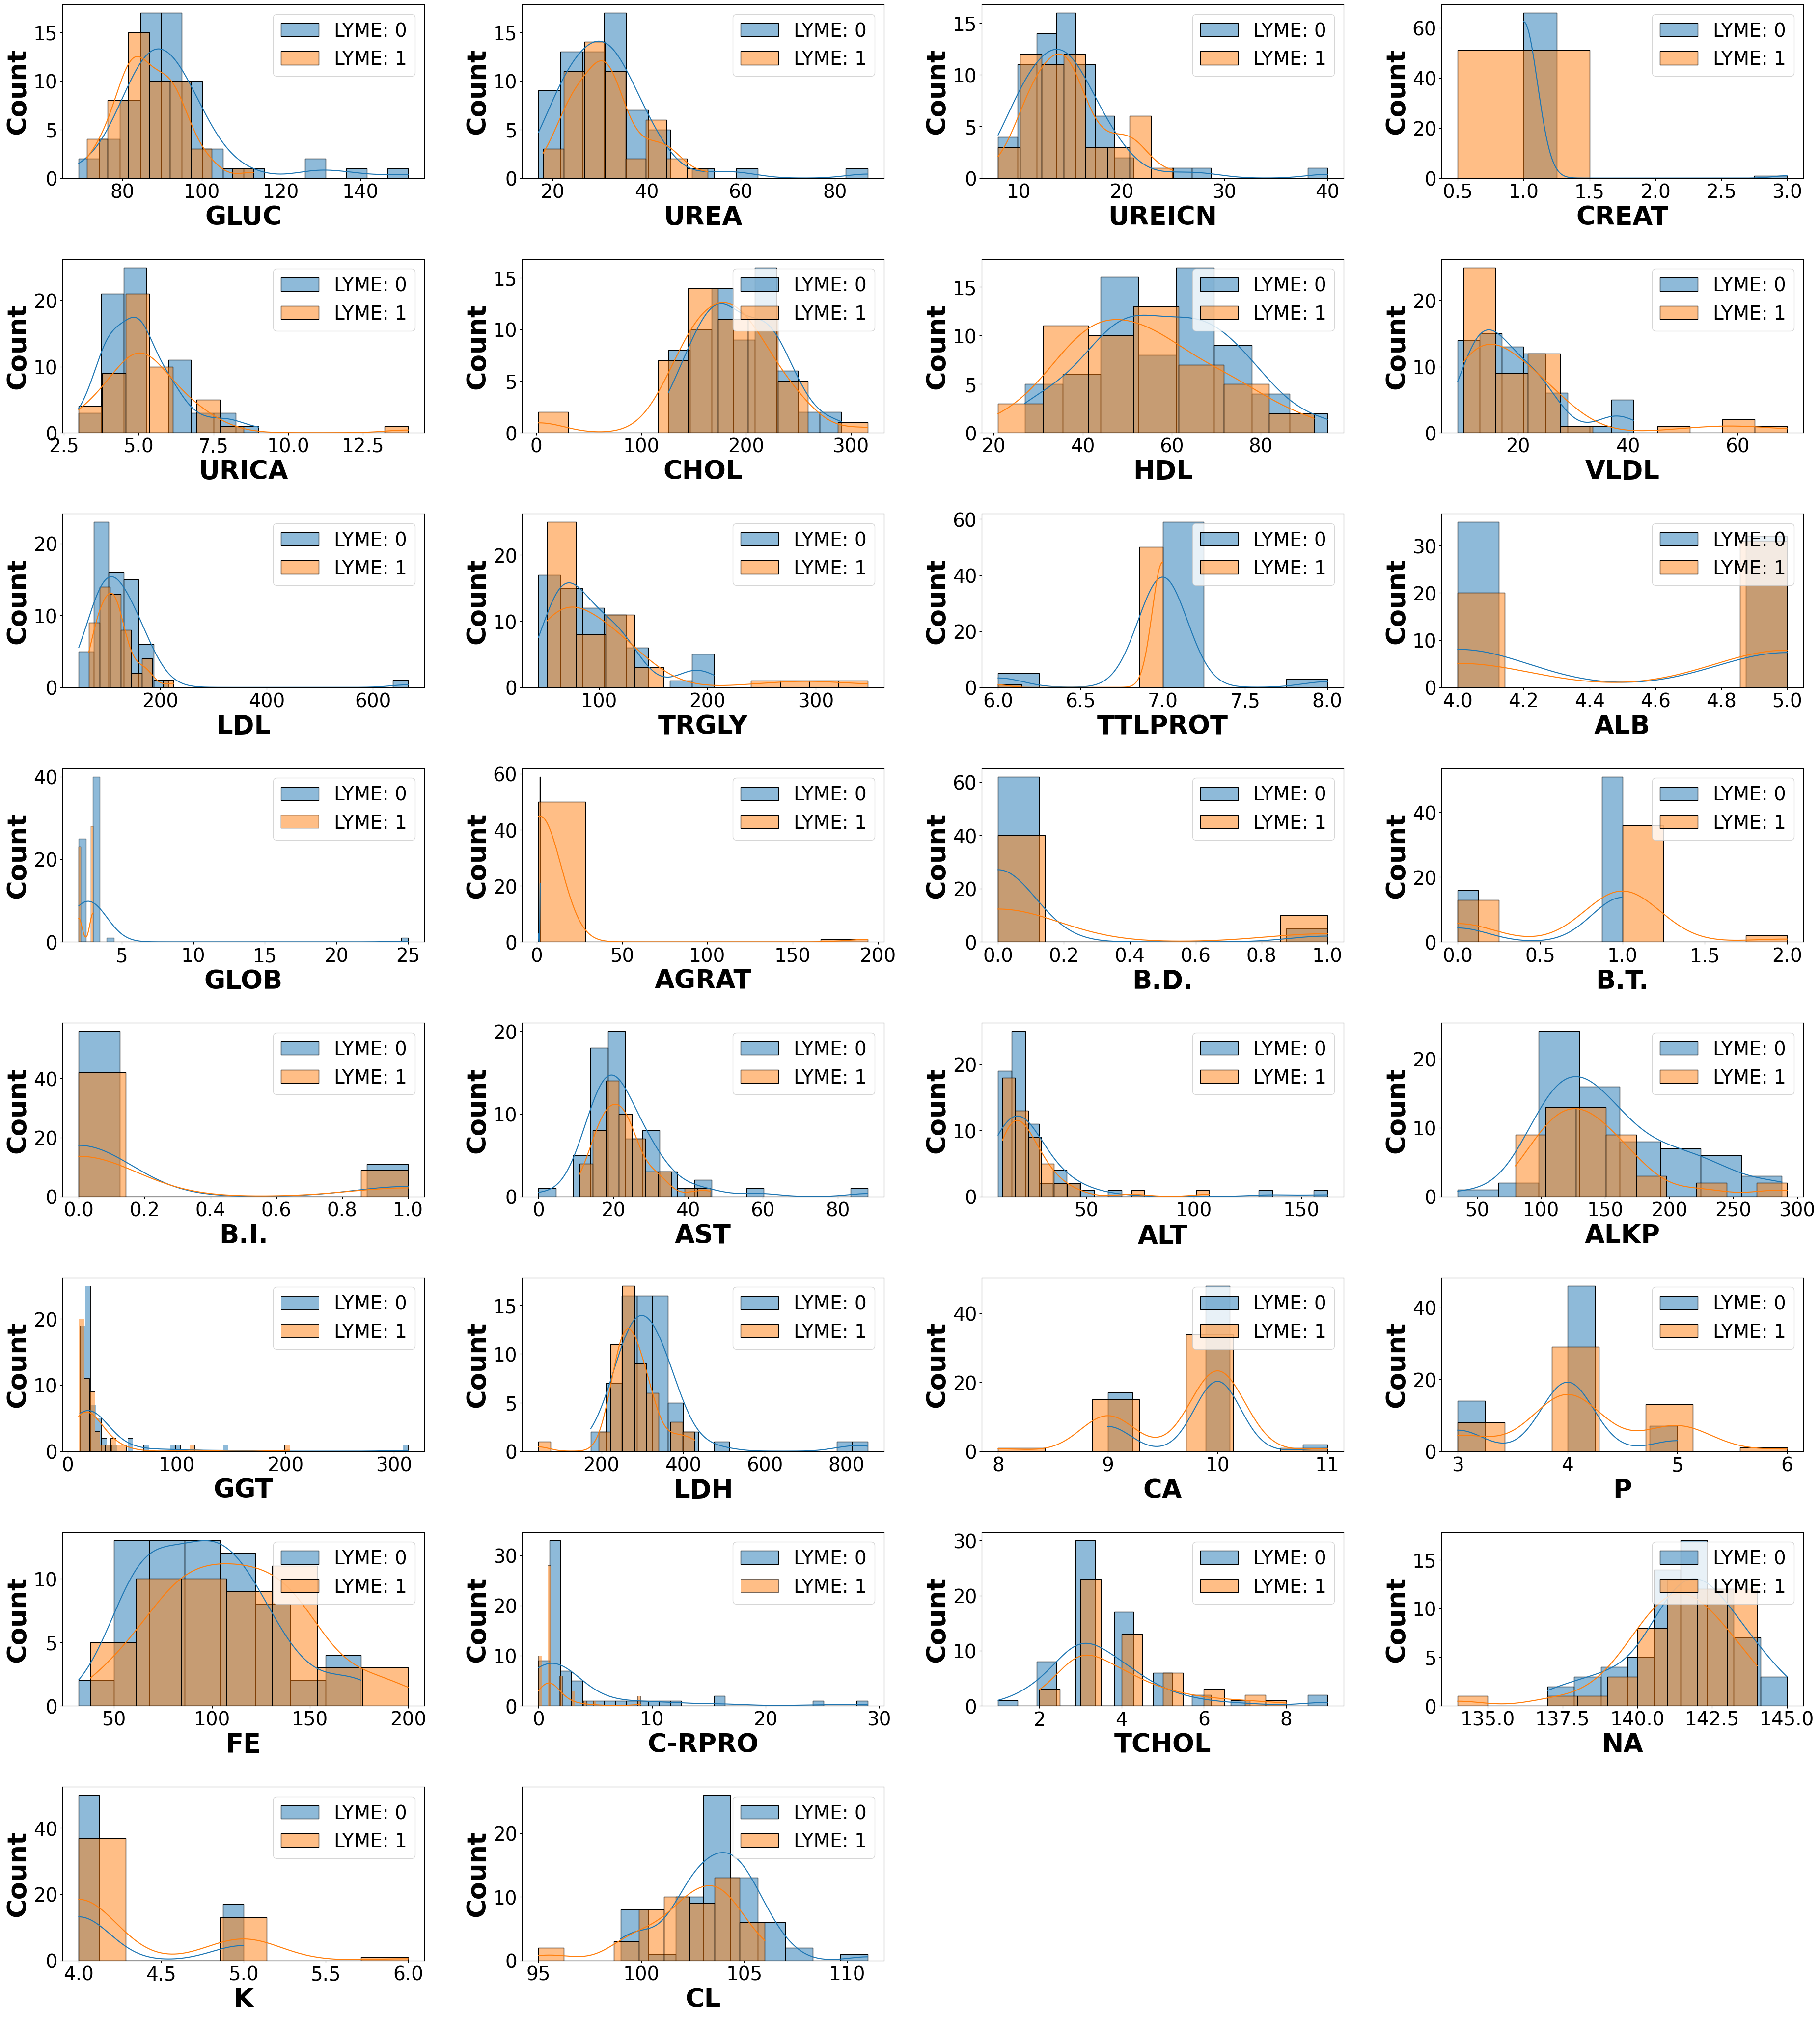

In [ ]:
### Visualize trends between blood chemistry and LYME
# List of columns
cols = ["GLUC", "UREA", "UREICN", "CREAT", "URICA", "CHOL", "HDL", "VLDL",
        "LDL", "TRGLY", "TTLPROT", "ALB", "GLOB", "AGRAT", "B.D.",
        "B.T.", "B.I.", "AST", "ALT", "ALKP", "GGT", "LDH", "CA",
        "P", "FE", "C-RPRO", "TCHOL", "NA", "K", "CL"]

# Calculate the number of rows and columns in the grid
num_cols = 4
num_rows = (len(cols) + num_cols - 1) // num_cols

# Create subplots with calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(38, 42))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through columns and create histplots for each category in LYME
for i, col in enumerate(cols):
  # Loop through unique categories in LYME in reverse order
  # to match the color scheme with countplots above
  for category in reversed(df["LYME"].unique()):
    # Create histplot for current category
    sns.histplot(data=df[df["LYME"] == category], x=col, kde=True, ax=axes[i],
                 label=f"LYME: {category}")
    # Set legend position to "upper right"
    axes[i].legend(loc="upper right", fontsize=28)
    # Set x and y labels font size
    axes[i].set_xlabel(col, fontsize=38, fontweight="bold")
    axes[i].set_ylabel("Count", fontsize=38, fontweight="bold")
    # Set font size for x and y axis ticks
    axes[i].tick_params(axis="both", which="major", labelsize=28)

# Hide empty subplots
for i in range(len(cols), len(axes.flatten())):
    axes.flatten()[i].axis("off")

# Adjust spacing between subplots
plt.tight_layout(pad=4)

# Export the plot
plt.savefig(file_path+"/figures/Figure_5.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()

##Figure 6

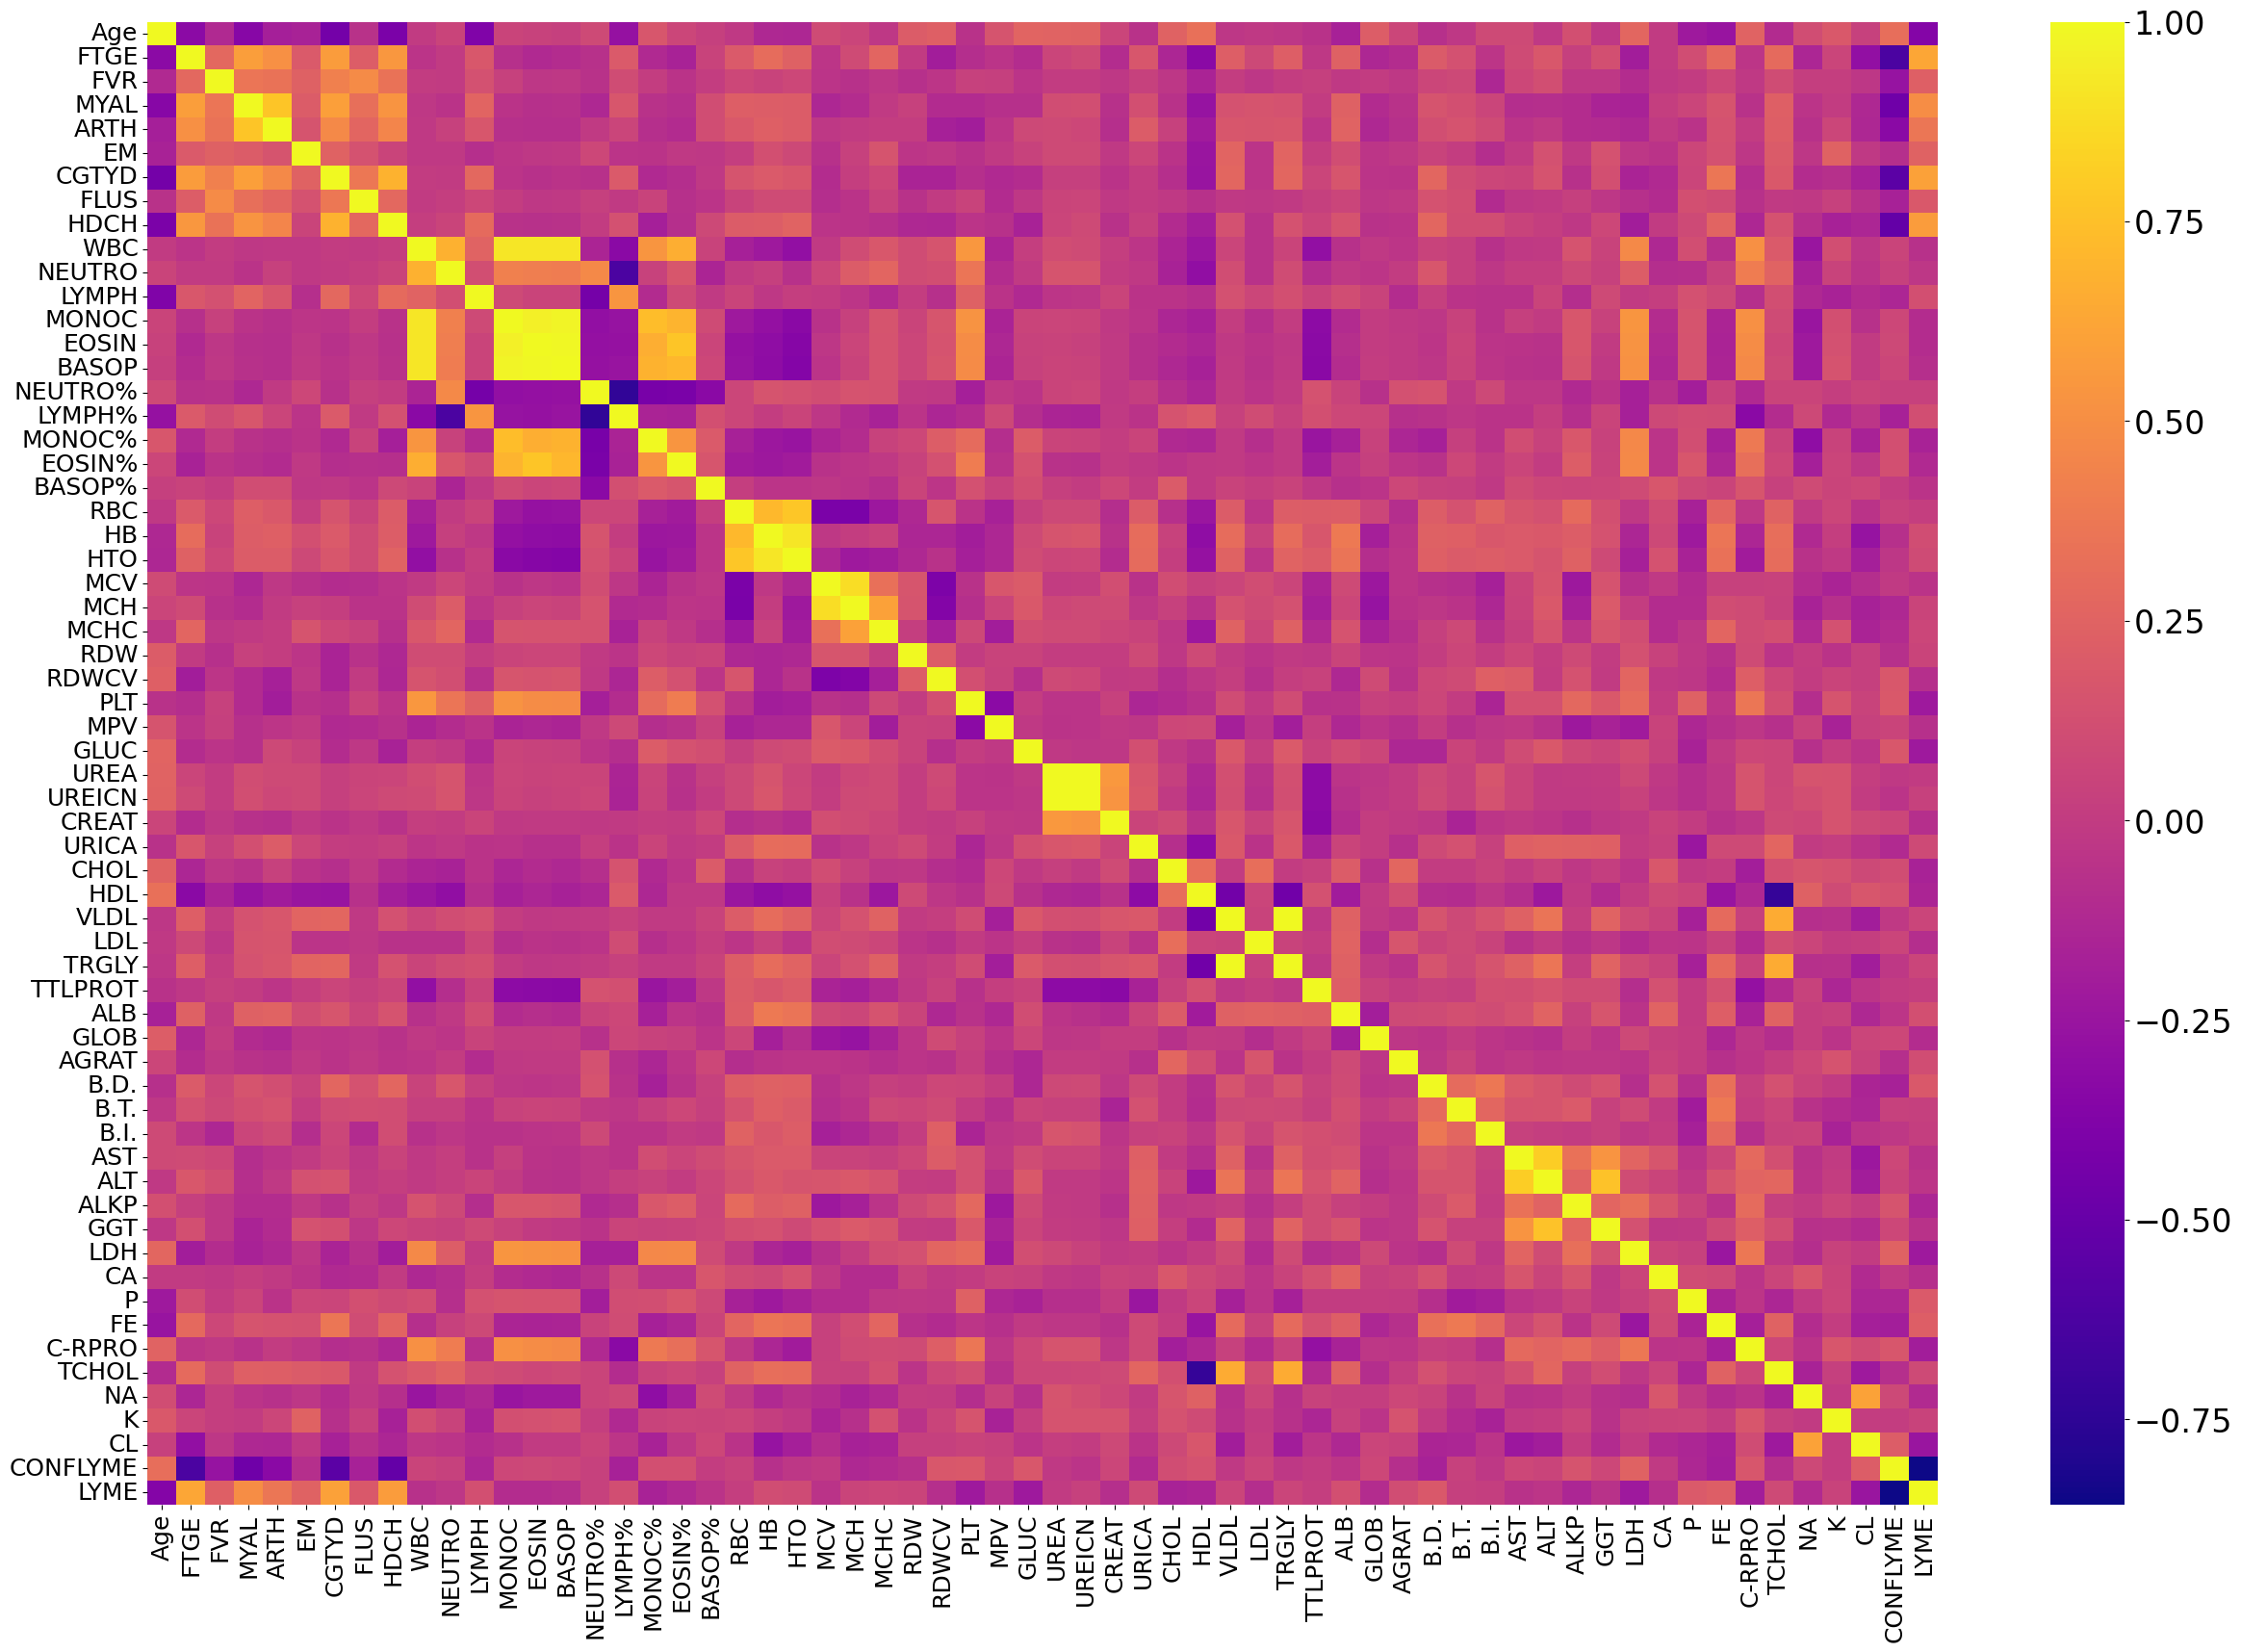

In [ ]:
# Visualizing pearson correlation amongst the columns
plt.figure(figsize=(30,20))
sns.heatmap(data=df.corr(),cmap="plasma")

# Set font size for x and y axis ticks
plt.tick_params(axis="both", which="major", labelsize=18)

# Access the colorbar object and set font size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=24)

# Export the plot
plt.savefig(file_path+"/figures/Figure_6.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()

##Figure 7

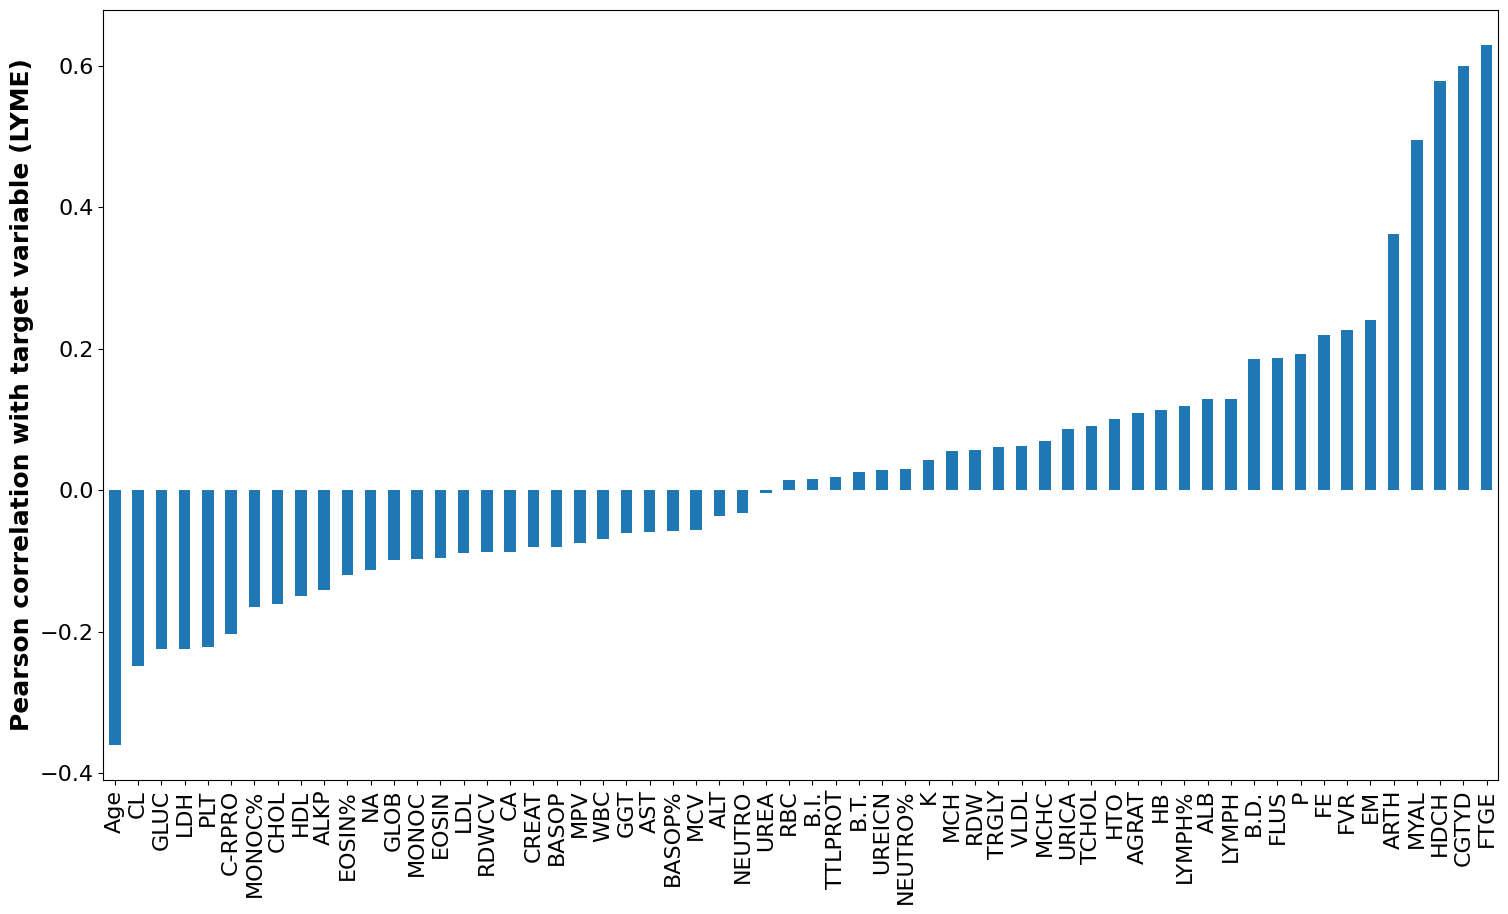

In [ ]:
#Visualizing pearson correlation in regards to LYME
df.corr()["LYME"].sort_values()[1:-1].plot(kind="bar",figsize=(18,10))

# Set font size and weight for x and y axis labels
plt.ylabel("Pearson correlation with target variable (LYME)",
           fontsize=18, fontweight="bold")

# Set font size for x and y axis ticks
plt.tick_params(axis="both", which="major", labelsize=16)

# Export the plot
plt.savefig(file_path+"/figures/Figure_7.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()

##Figure 8

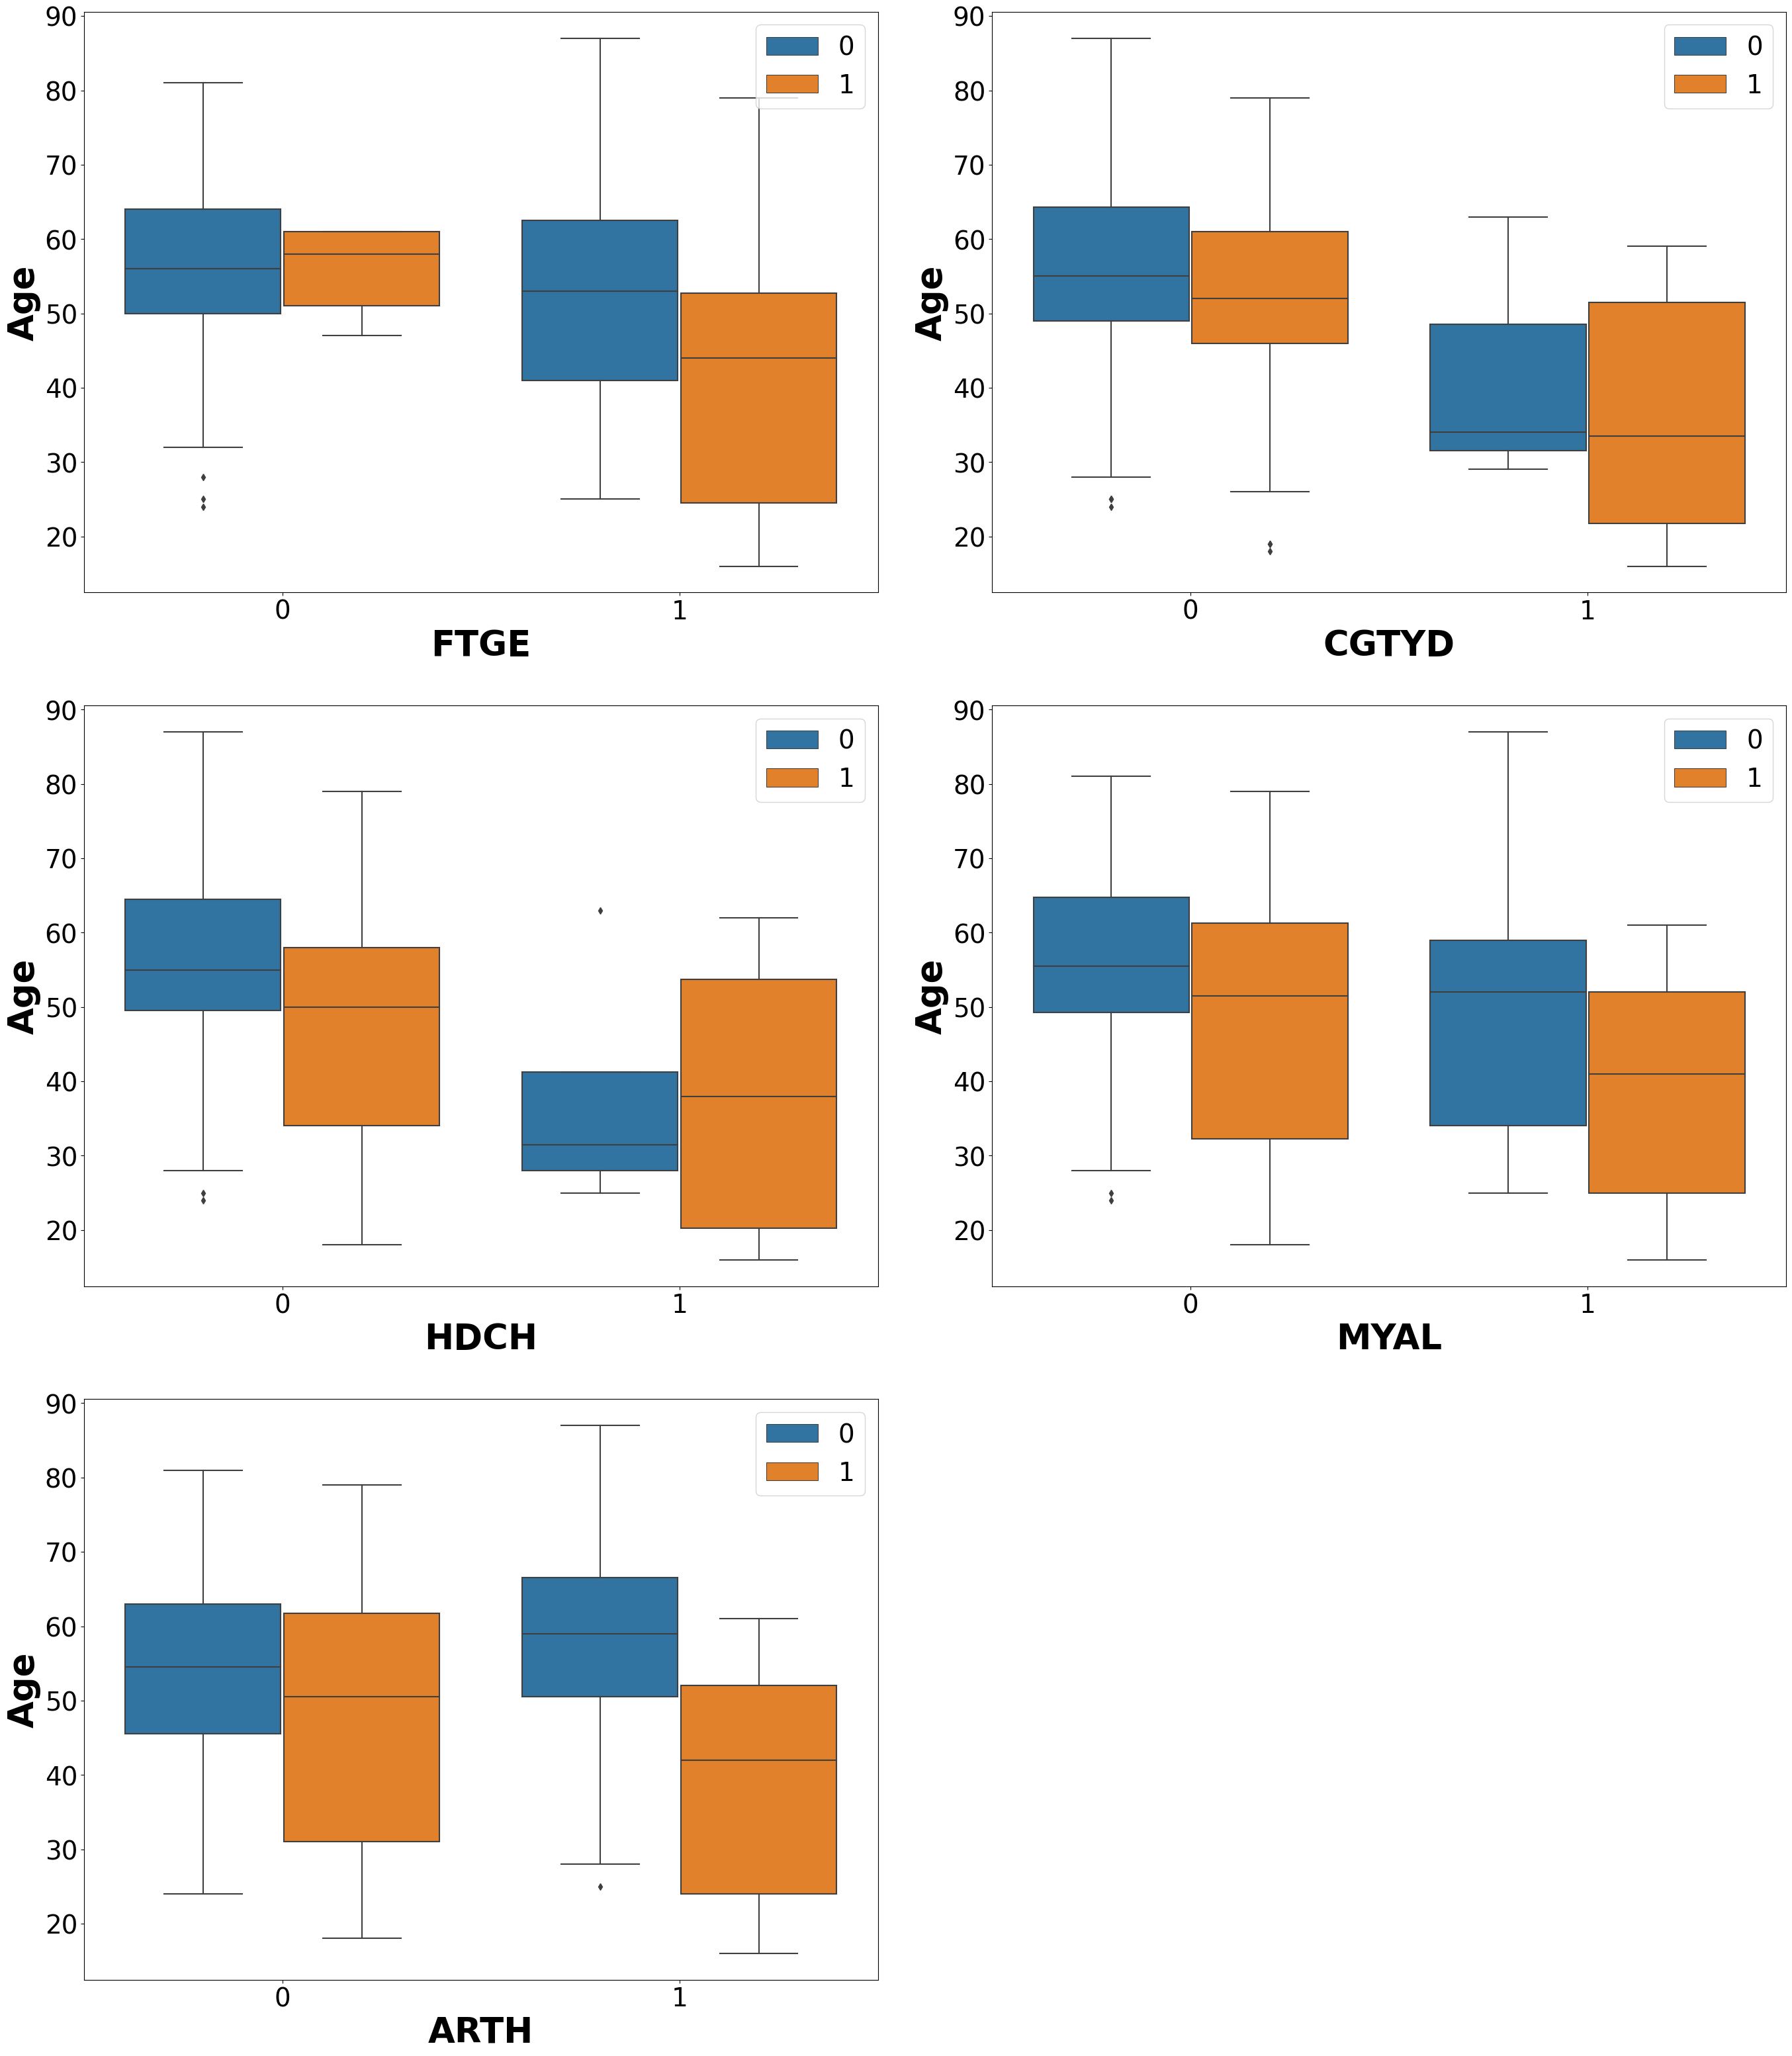

In [ ]:
### Vizualize trends between symptoms and LYME in relation to patient age
# List of columns
cols = ["FTGE", "CGTYD", "HDCH", "MYAL", "ARTH"]

# Create subplots with 5 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(28, 32))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(cols):
    # Create boxplots
    sns.boxplot(data=df, x=col, y="Age", hue="LYME",  ax=axes[i])
    # Set legend position to "upper right"
    axes[i].legend(loc="upper right", fontsize=28)
    # Set x and y labels font size
    axes[i].set_xlabel(col, fontsize=38, fontweight="bold")
    axes[i].set_ylabel("Age", fontsize=38, fontweight="bold")
    # Set font size for x and y axis ticks
    axes[i].tick_params(axis="both", which="major", labelsize=28)

# Hide empty subplots
for i in range(len(cols), len(axes.flatten())):
    axes.flatten()[i].axis("off")

# Adjust spacing between subplots
plt.tight_layout(pad=4)

# Export the plot
plt.savefig(file_path+"/figures/Figure_8.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()

# STEP 4 = Divide data into training and testing sets

In [ ]:
# Seperate "LYME" column into a different dataframe
X = df.drop("LYME",axis=1)
y = df["LYME"]

# Settimg a single global seed for reproducible results
rng = np.random.RandomState(0)

# Dividing data into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=rng)

In [ ]:
# Checking the shape of X_train, y_train, X_test, and y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((82, 63), (82,), (36, 63), (36,))

#STEP 5 = Feature engineering

In [ ]:
# Checking variables or columns with the missing_data function in X_train
missing_data(X_train).head(3)

Absolute missing values  Percentage missing values
UREA                        1                       1.22
B.D.                        1                       1.22
B.T.                        0                       0.00

In [ ]:
# Checking variables or columns with the missing_data function in X_test
missing_data(X_test).head(3)

Absolute missing values  Percentage missing values
Age                           0                        0.0
B.T.                          0                        0.0
UREICN                        0                        0.0

In [ ]:
# Creating a function that can test if the variable is normally distributed
def shapiro_test(data,column_to_test):
  # Perform the Shapiro-Wilk test
  stat, p = shapiro(data[column_to_test])
  # Print the results
  print(f"Shapiro-Wilk test statistic: {stat:.3f}, p-value: {p:.3f}")
  if p > 0.05:
    print(f"{column_to_test} is likely normally distributed. Use mean imputation")
  else:
    print(f"{column_to_test} is not normally distributed. Use median imputation")

In [ ]:
# Checking normal distribution for column "UREA" in X_train
shapiro_test(X_train,"UREA")

Shapiro-Wilk test statistic: nan, p-value: 1.000
UREA is likely normally distributed. Use mean imputation


In [ ]:
# Checking normal distribution for column "B.D." in X_train
shapiro_test(X_train,"B.D.") 

Shapiro-Wilk test statistic: nan, p-value: 1.000
B.D. is likely normally distributed. Use mean imputation


In [ ]:
### Filling values missing in different values
# UREA use mean imputation -> Impute in X_train
X_train["UREA"].fillna(value=X_train["UREA"].mean(), inplace=True)

# B.D. use mean imputation -> Impute in X_train
X_train["B.D."].fillna(value=X_train["B.D."].mean(), inplace=True)

### Replace string with intergers
# Replacing the sex column with binary code for female and male in X_train
X_train["Sex"] = X_train["Sex"].map({"Male": 0, "Female": 1})

# Replacing the sex column with binary code for female and male in X_test
X_test["Sex"] = X_test["Sex"].map({"Male": 0, "Female": 1})

### Drop columns before feature selection and model building
# Drop ETHY column from X_train as it does not add value 
X_train.drop(["ETHY"], axis=1, inplace=True)

# Drop ETHY column from X_test as it does not add value 
X_test.drop(["ETHY"], axis=1, inplace=True)

# Drop CONFLYME column from X_train 
X_train.drop(["CONFLYME"], axis=1, inplace=True)

# Drop CONFLYME column from X_test 
X_test.drop(["CONFLYME"], axis=1, inplace=True)

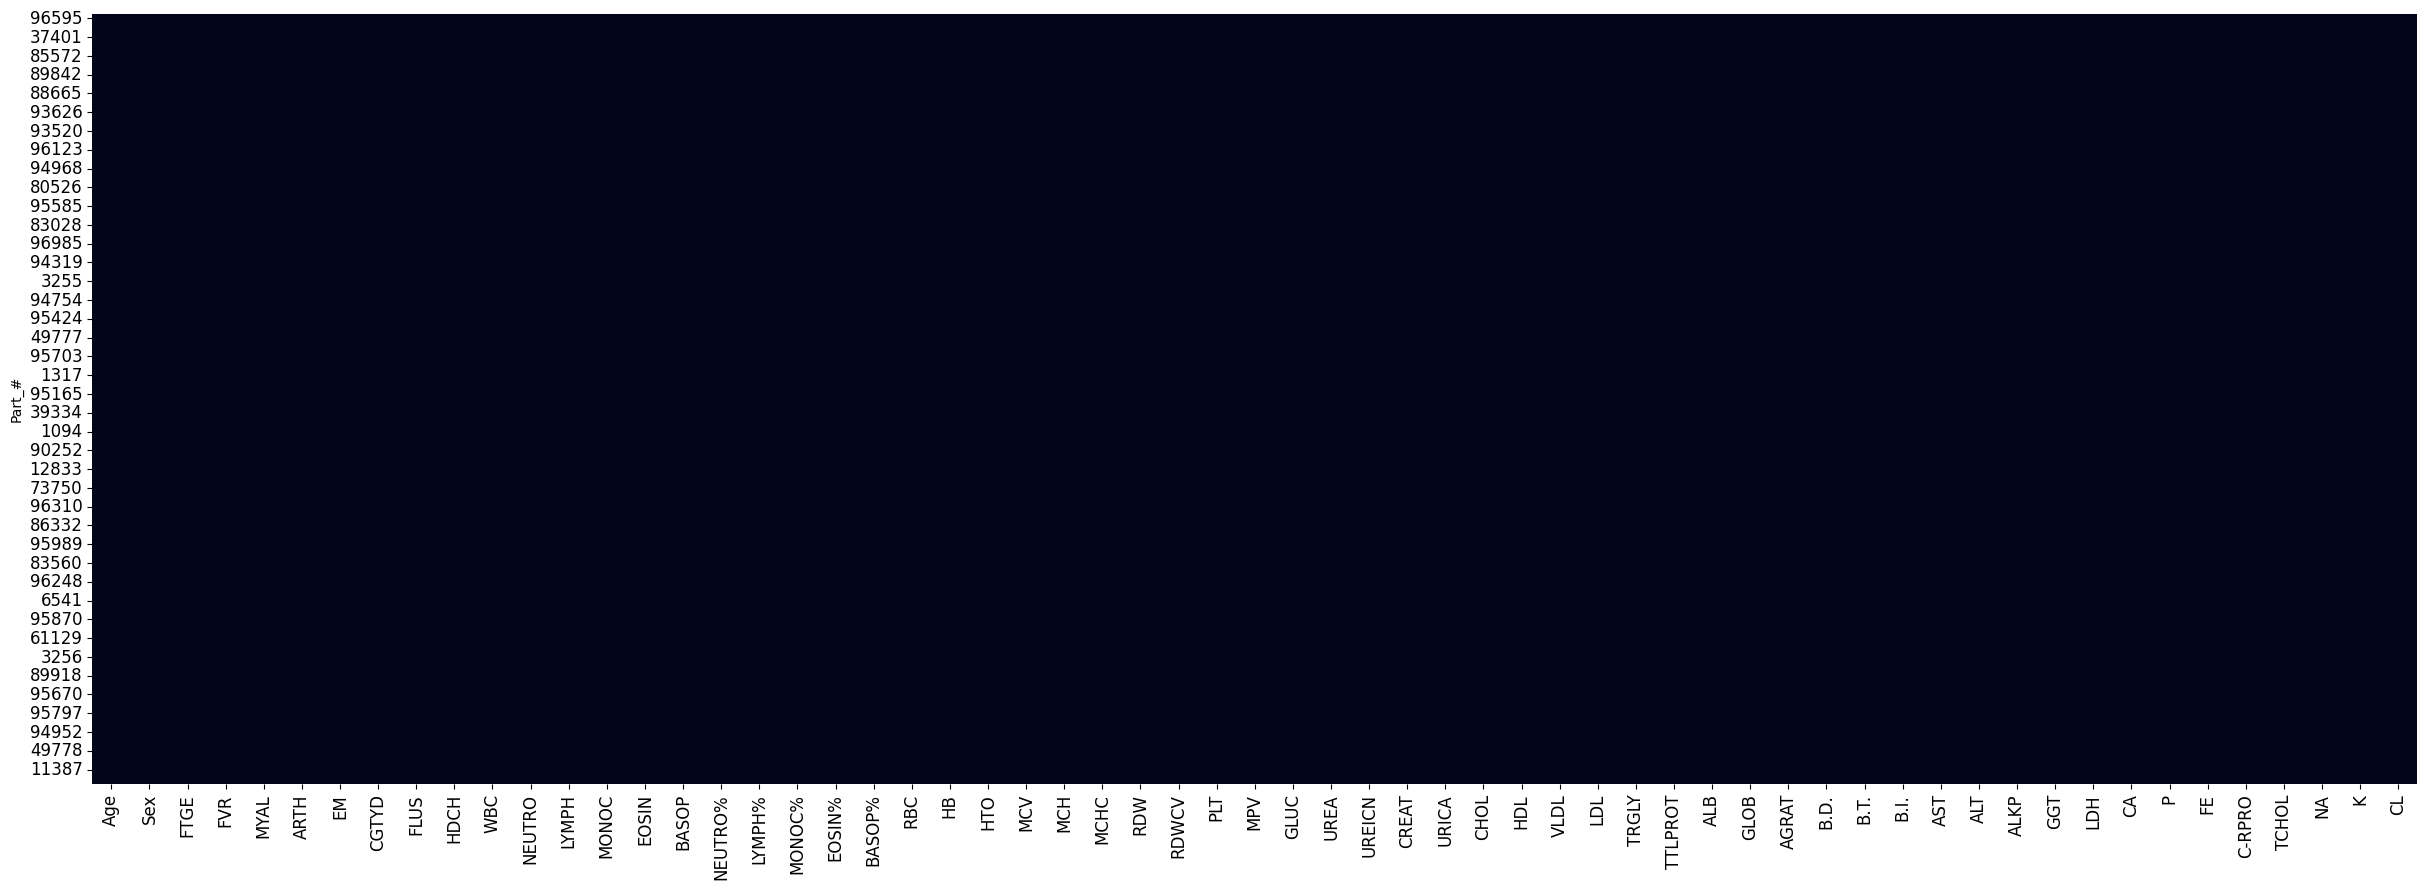

In [ ]:
# Visualizing if data is still missing in X_train
plt.figure(figsize=(30,10))
sns.heatmap(X_train.isnull(), cbar=False)

# Set font size for x and y axis ticks
plt.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

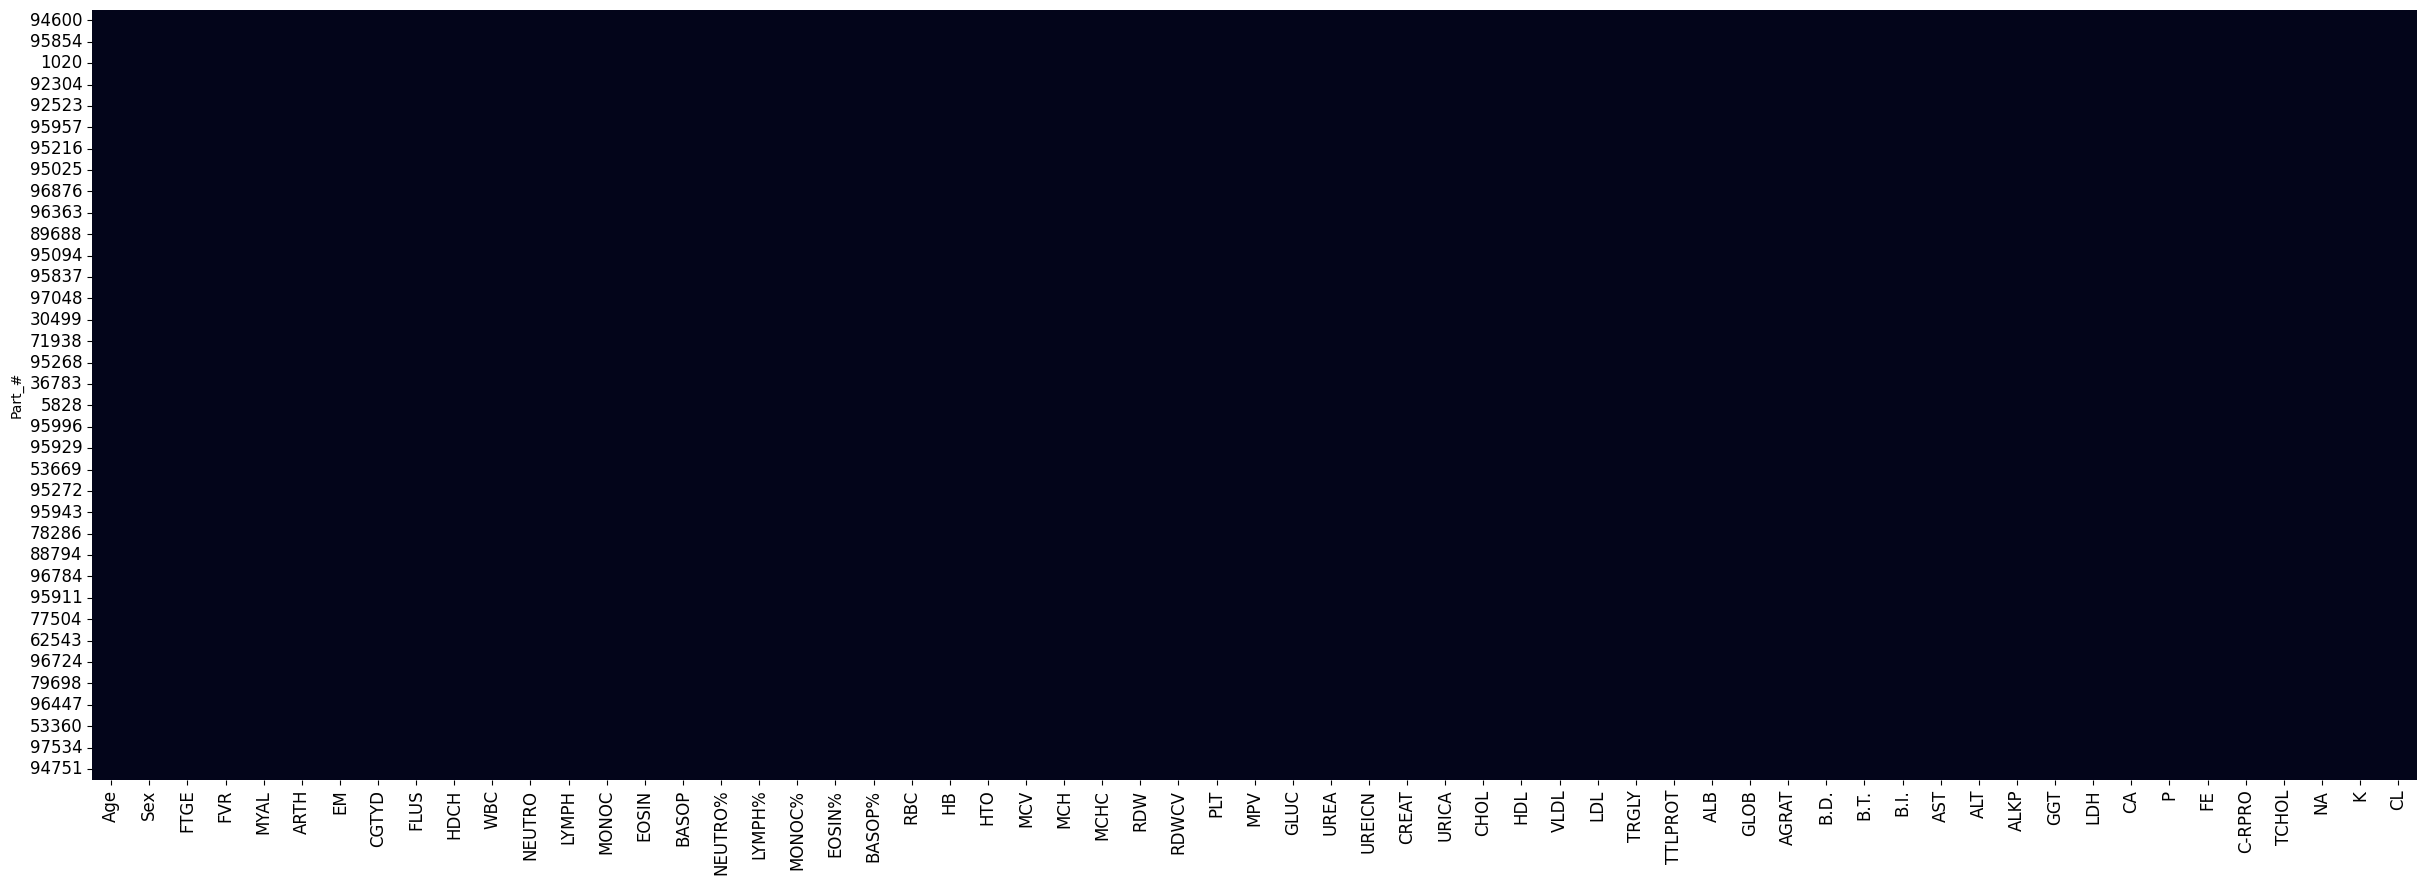

In [ ]:
# Visualizing if data is still missing in X_test
plt.figure(figsize=(30,10))
sns.heatmap(X_test.isnull(), cbar=False)

# Set font size for x and y axis ticks
plt.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

In [ ]:
# Create a new feature "symptom_count" in X_train and X_test that sums values 
# for each specimen from "FTGE","MYAL","ARTH","CGTYD",and "HDCH"
X_train["symptom_count"] = X_train[["FTGE","MYAL","ARTH","CGTYD","HDCH"]].sum(axis=1)
X_test["symptom_count"] = X_test[["FTGE","MYAL","ARTH","CGTYD","HDCH"]].sum(axis=1)

In [ ]:
# Specify blood count and blood chemistry variables to be discretized
columns_to_discretize = ["WBC", "NEUTRO", "LYMPH", "MONOC", "EOSIN", "BASOP",
                         "NEUTRO%", "LYMPH%", "MONOC%", "EOSIN%", "BASOP%",
                         "RBC", "HB", "HTO", "MCV", "MCH", "MCHC", "RDW",
                         "RDWCV", "PLT", "MPV", "GLUC", "UREA", "UREICN",
                         "CREAT", "URICA", "CHOL", "HDL", "VLDL", "LDL",
                         "TRGLY", "TTLPROT", "ALB", "GLOB", "AGRAT", "B.D.",
                         "B.T.", "B.I.", "AST", "ALT", "ALKP", "GGT", "LDH",
                         "CA", "P", "FE", "C-RPRO", "TCHOL", "NA", "K", "CL"]

# Instantiate EqualFrequencyDiscreter to create five bins 
efd = EqualFrequencyDiscretiser(q=5, variables=columns_to_discretize)

# Fit the instantiated EqualFrequencyDiscreter on the training set
# and transform the relavant variables
X_train = efd.fit_transform(X_train)

# Discretize blood count and blood chemistry variables in X_test using the efd
# already fitted on X_train
X_test = efd.transform(X_test)

In [ ]:
# Access the efd binner dictionary
efd.binner_dict_

{'WBC': [-inf, 4.0, 4.399999999999999, 5.0, 7.0, inf],
 'NEUTRO': [-inf, 2.0, 3.0, 4.0, inf],
 'LYMPH': [-inf, 2.0, inf],
 'MONOC': [-inf, inf],
 'EOSIN': [-inf, inf],
 'BASOP': [-inf, inf],
 'NEUTRO%': [-inf, 46.2, 53.0, 59.0, 65.0, inf],
 'LYMPH%': [-inf, 23.0, 29.0, 34.0, 38.8, inf],
 'MONOC%': [-inf, 5.0, 7.0, 8.0, 9.0, inf],
 'EOSIN%': [-inf, 2.0, 4.0, 5.0, inf],
 'BASOP%': [-inf, 1.0, 2.0, inf],
 'RBC': [-inf, 4.0, 5.0, inf],
 'HB': [-inf, 13.0, 14.0, 15.0, inf],
 'HTO': [-inf, 39.0, 40.0, 43.0, 45.0, inf],
 'MCV': [-inf, 88.0, 89.4, 92.0, 93.0, inf],
 'MCH': [-inf, 29.0, 29.4, 30.0, 31.0, inf],
 'MCHC': [-inf, 32.0, 33.0, 34.0, inf],
 'RDW': [-inf, 34.0, 36.0, 38.0, 40.0, inf],
 'RDWCV': [-inf, 13.0, 14.0, 15.0, inf],
 'PLT': [-inf, 212.6, 250.4, 278.8, 328.4, inf],
 'MPV': [-inf, 6.0, 7.0, 7.6000000000000085, 8.0, inf],
 'GLUC': [-inf, 83.0, 86.0, 91.0, 95.8, inf],
 'UREA': [-inf, 24.0, 29.0, 32.0, 37.0, inf],
 'UREICN': [-inf, 11.0, 13.0, 15.0, 17.799999999999997, inf],
 'CREA

##Figure 9

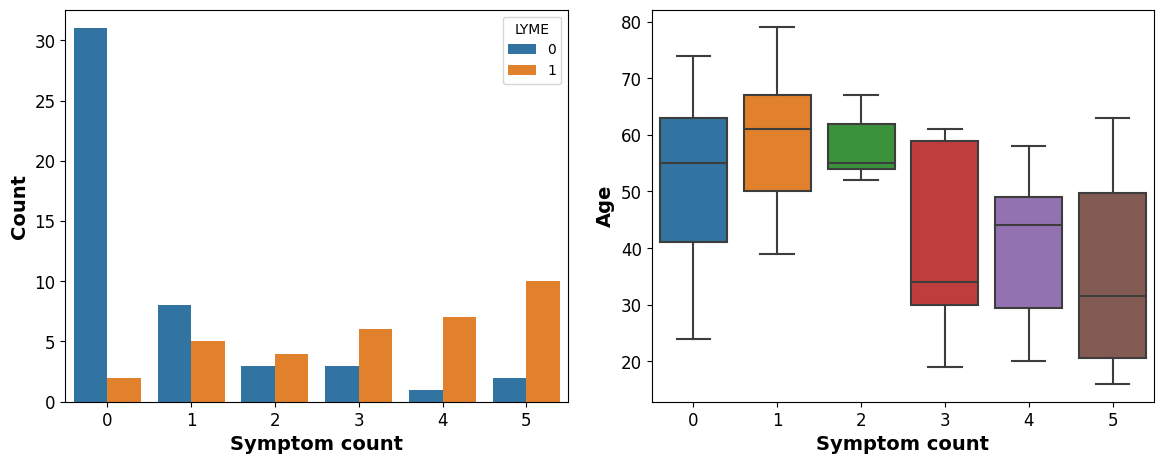

In [ ]:
# Creating a temporary dataframe including all columns from X_train and y_train
train_df = pd.concat([X_train, y_train], axis=1)

# Creating a 1-Dimensional subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Creating count and box plots to visualize trends between 
# "symptom_count", "LYME", and "Age"
sns.countplot(data=train_df, x="symptom_count", hue="LYME", ax =axes[0])
sns.boxplot(data=train_df, x="symptom_count", y="Age", ax=axes[1])

# Set font size and weight for x and y axis labels
axes[0].set_xlabel("Symptom count", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Count", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Symptom count", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Age", fontsize=14, fontweight="bold")

# Set font size for axis ticks
axes[0].tick_params(axis="both", which="major", labelsize=12)
axes[1].tick_params(axis="both", which="major", labelsize=12)

# Adjust spacing between subplots
plt.tight_layout(pad=2)

# Export the plot
plt.savefig(file_path+"/figures/Figure_9.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()

#STEP 6 = Feature scaling

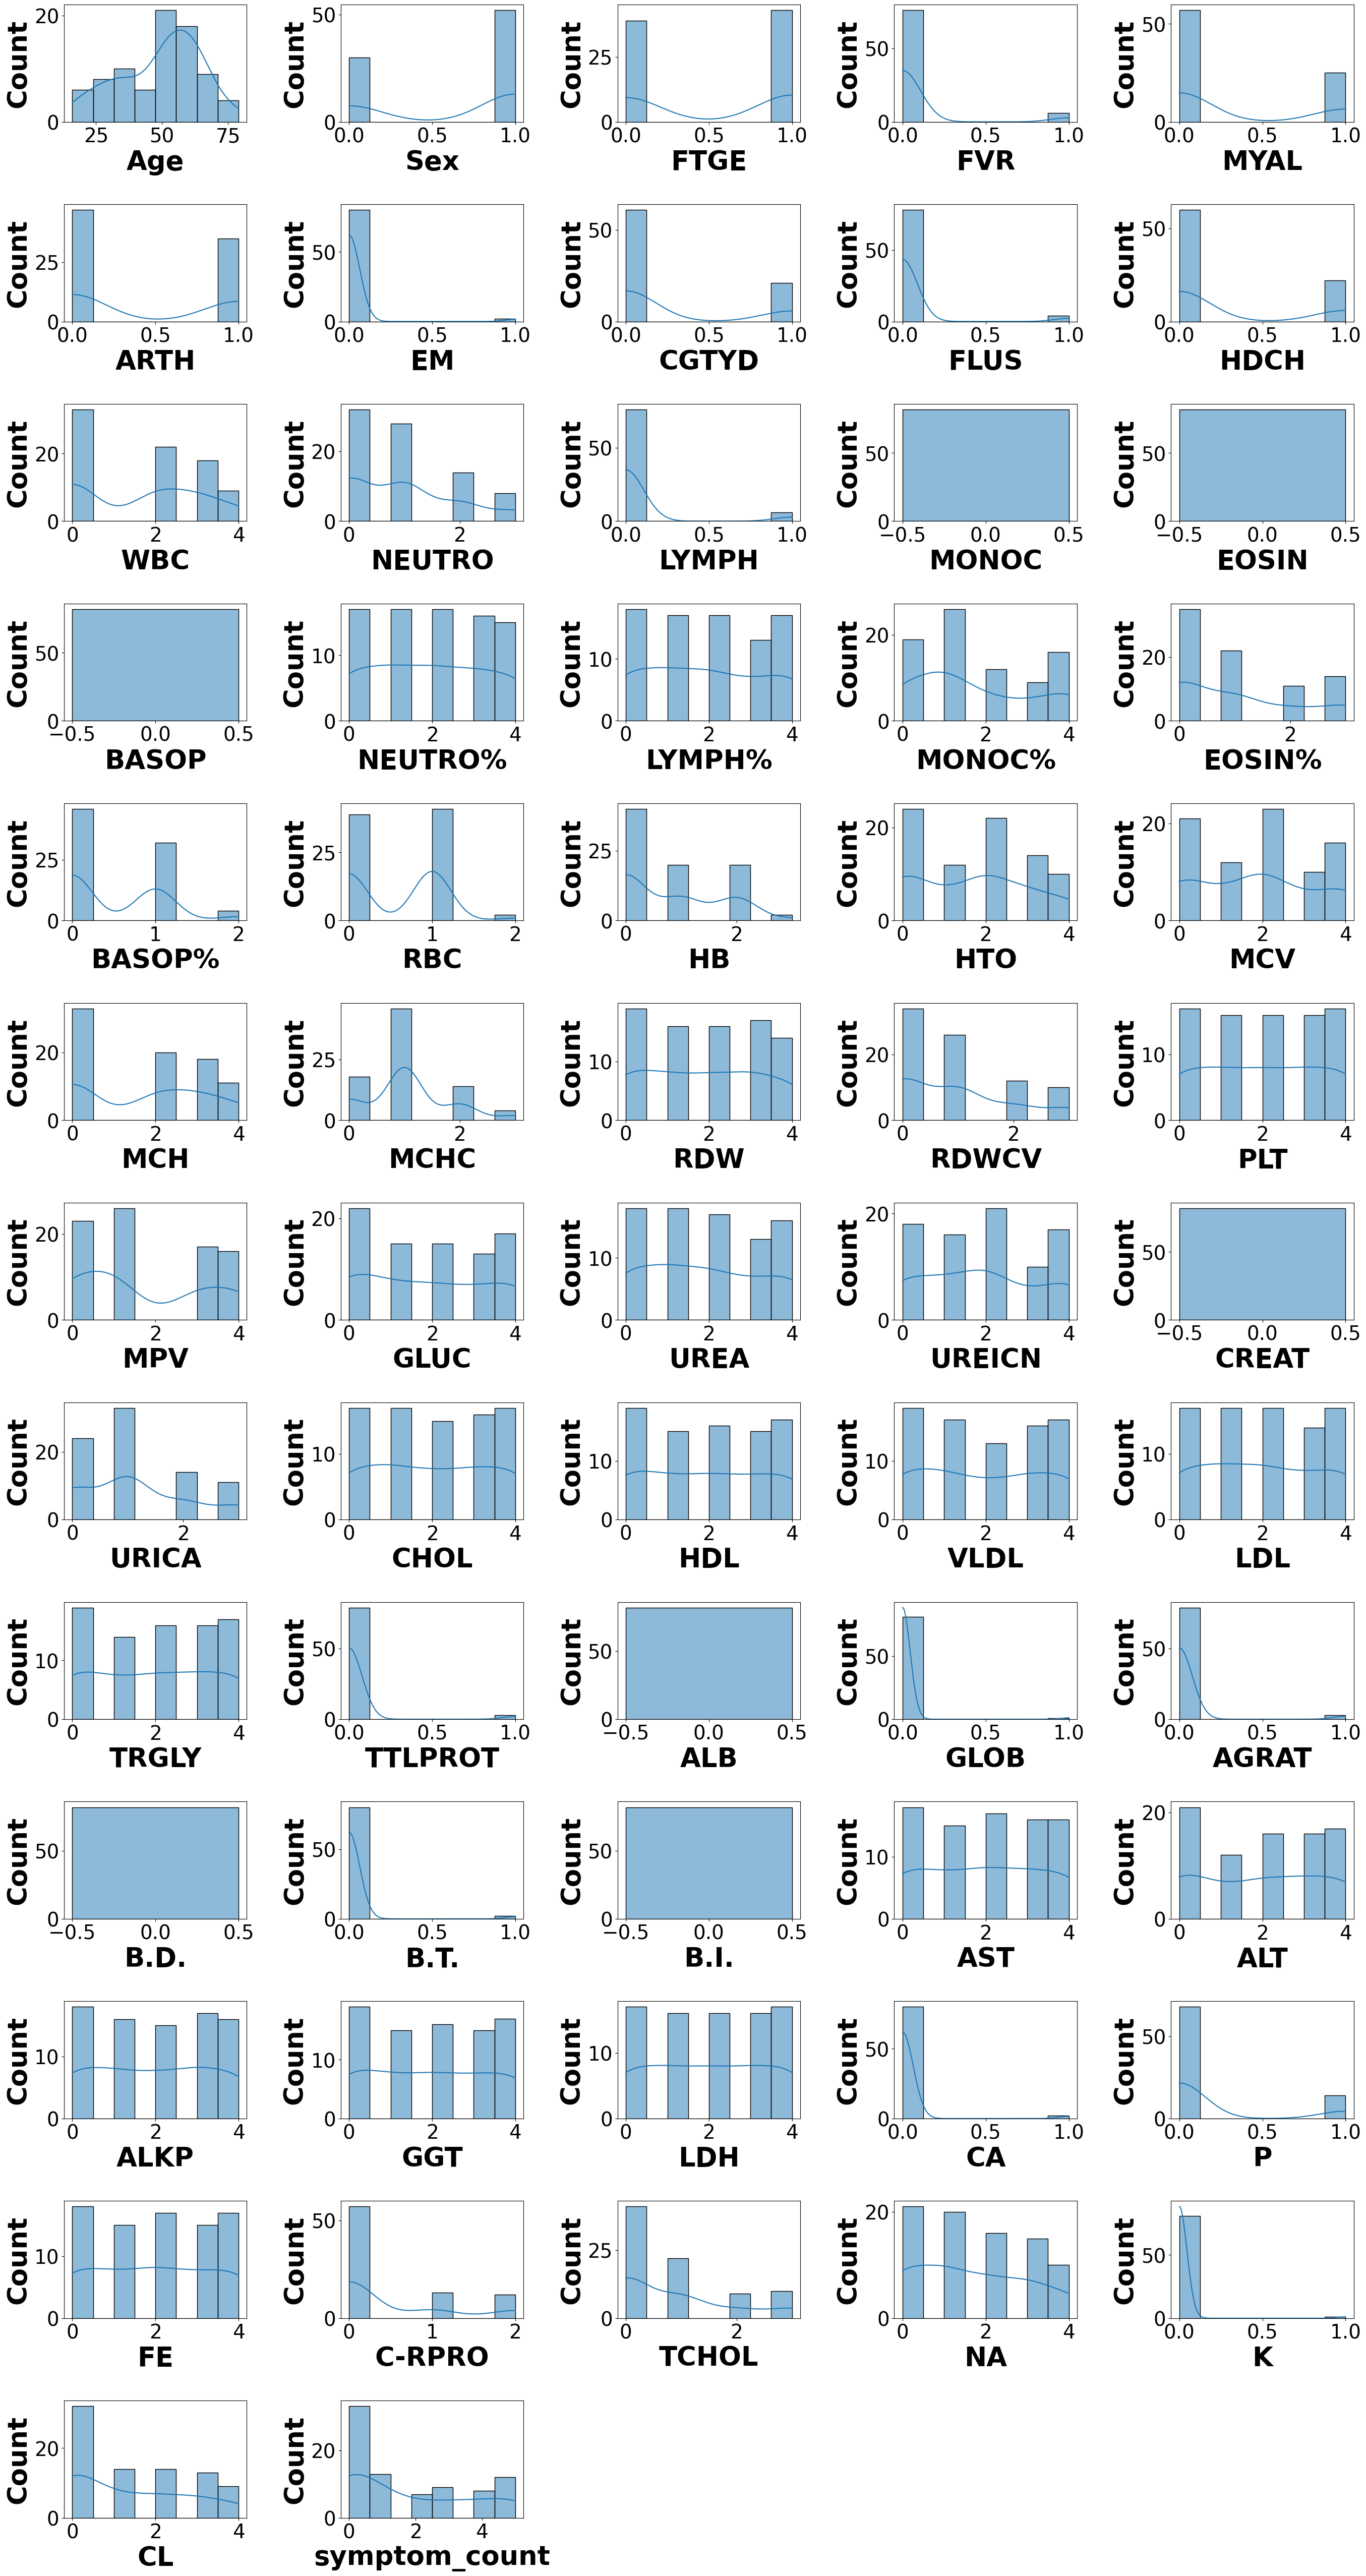

In [ ]:
### Creating a histogram for all columns in X_train to visualize the distribution
# List of columns
cols = X_train.columns

# Calculate the number of rows and columns in the grid
num_cols = 5
num_rows = (len(cols) + num_cols - 1) // num_cols

# Create subplots with calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(28, 52))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through columns and create histplots for each category in LYME
for i, col in enumerate(cols):
  # Create histplot for current category
  sns.histplot(data=X_train, x=col, kde=True, ax=axes[i])
  # Set x and y labels font size
  axes[i].set_xlabel(col, fontsize=38, fontweight="bold")
  axes[i].set_ylabel("Count", fontsize=38, fontweight="bold")
  # Set font size for x and y axis ticks
  axes[i].tick_params(axis="both", which="major", labelsize=28)

# Hide empty subplots
for i in range(len(cols), len(axes.flatten())):
    axes.flatten()[i].axis("off")

# Adjust spacing between subplots
plt.tight_layout(pad=4)

# Hide empty subplots
for i in range(len(cols), len(axes.flatten())):
    axes.flatten()[i].axis("off")

# Show the plot
plt.show()

In [ ]:
# Scaling "Age" using the MinMaxScaler in X_train and X_test
scaler = MinMaxScaler()
age_train_scaled = scaler.fit_transform(X_train[["Age"]]).flatten()
age_test_scaled = scaler.transform(X_test[["Age"]]).flatten()

# Replacing the "Age" column in X_train and X_test with "Age" values
# scaled between 0 and 1 using MinMaxScaler
X_train["Age"] = age_train_scaled
X_test["Age"] = age_test_scaled

# STEP 7 = Feature selection

In [ ]:
# Performing feature selection by stack all the basic filter based 
# selection methods inside a pipeline
pipe = Pipeline([
    ("constant", DropConstantFeatures(tol=0.998)),
    ("duplicated", DropDuplicateFeatures()),
    ("correlation", SmartCorrelatedSelection(selection_method="variance")),
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
### Embedded feature selction with SelectFromModel and RandomForestClassifier (RFC)
# Select features using the impotance derived from random forests
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=rng))
sel_.fit(X_train, y_train)

# Remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is numpy array)
X_train_rf = pd.DataFrame(sel_.transform(X_train))
X_test_rf = pd.DataFrame(sel_.transform(X_test))

# Add back the column names
X_train_rf.columns = X_train.columns[(sel_.get_support())]
X_test_rf.columns = X_train.columns[(sel_.get_support())]

In [ ]:
# Checking the shape of training and testing set after feature selection
X_train_rf.shape, y_train.shape, X_test_rf.shape, y_test.shape

((82, 15), (82,), (36, 15), (36,))

In [ ]:
# Checking the features selected after applying filter and embedded methods
X_train_rf.columns

Index(['Age', 'FTGE', 'ARTH', 'CGTYD', 'HDCH', 'LYMPH%', 'MONOC%', 'RDW',
       'PLT', 'GLUC', 'AST', 'GGT', 'FE', 'CL', 'symptom_count'],
      dtype='object')

##Figure 10

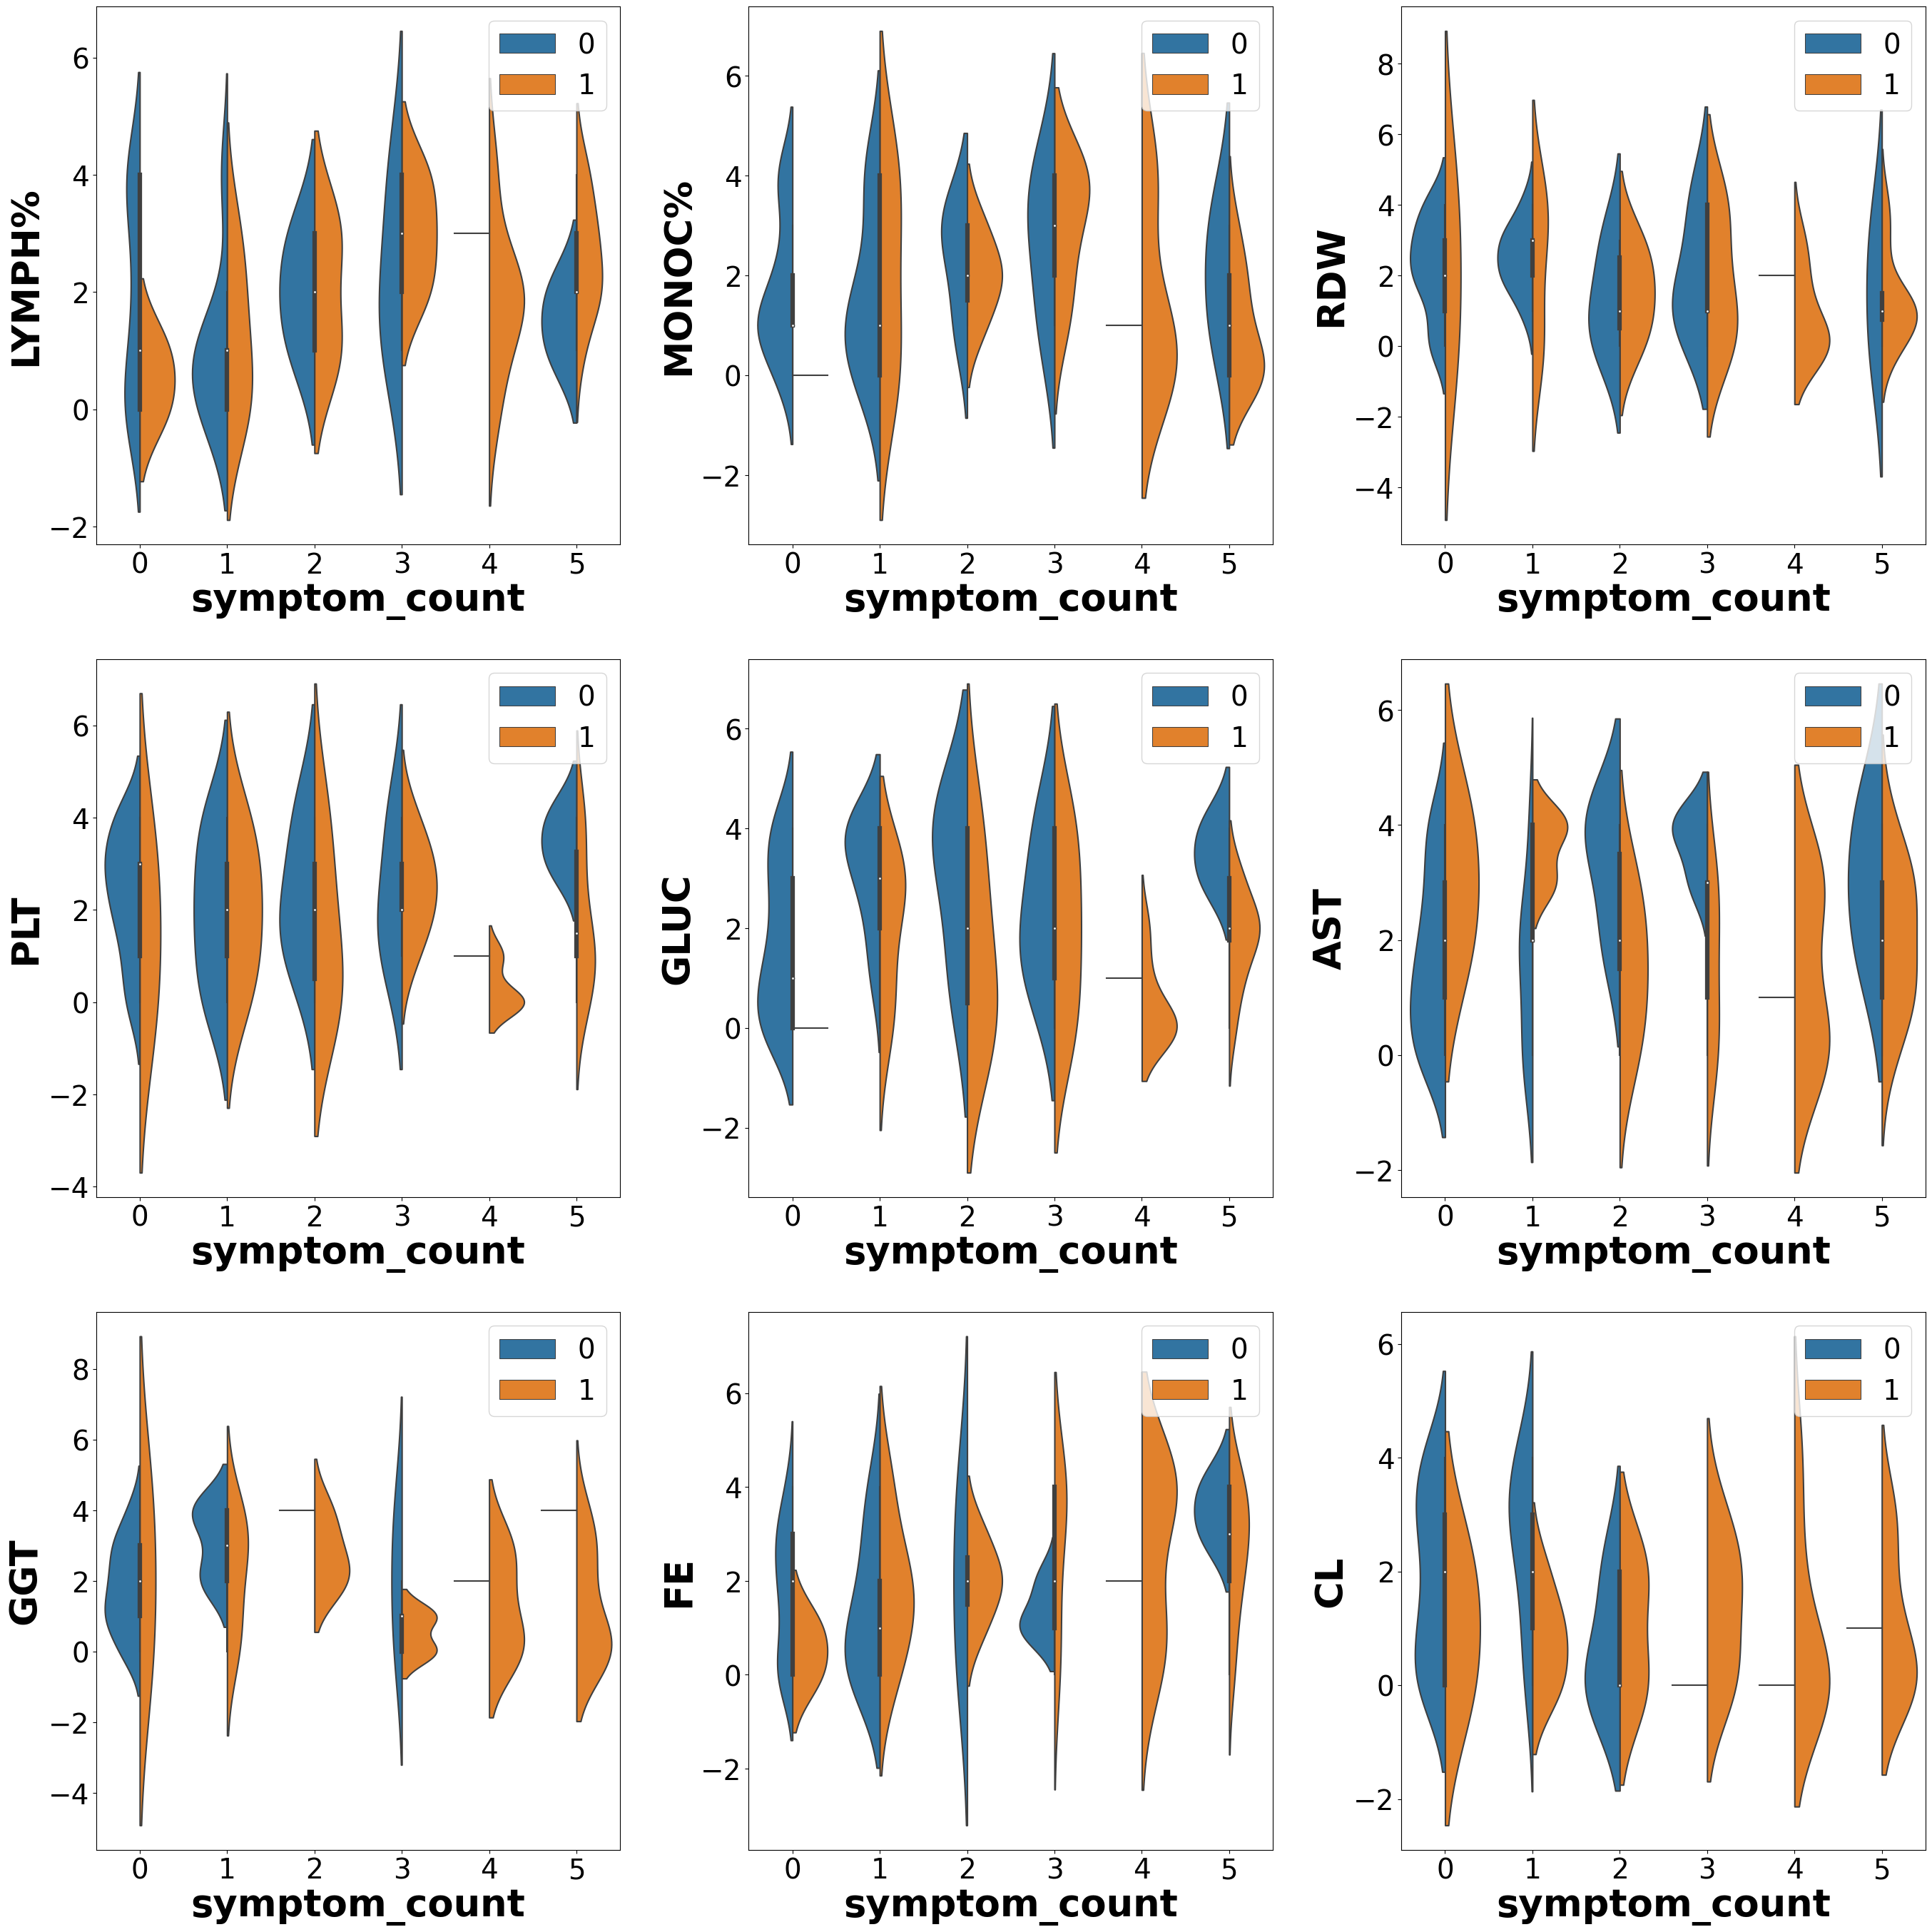

In [ ]:
### Vizualize trends between symptom_count and LYME for 
### "LYMPH", "HTO", "RDW", "GLUC", "VLDL", "ALT", "GGT"
cols = ["LYMPH%", "MONOC%", "RDW", "PLT", "GLUC", "AST", "GGT", "FE", "CL"]

# Calculate the number of rows and columns in the grid
num_cols = 3
num_rows = (len(cols) + num_cols - 1) // num_cols

# Create subplots with calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(28, 28))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(cols):
    # Create boxplots
    sns.violinplot(data=train_df, x="symptom_count", y=col, hue="LYME",
                   split=True, ax=axes[i])
    # Set legend position to "upper right"
    axes[i].legend(loc="upper right", fontsize=28)
    # Set x and y labels font size
    axes[i].set_xlabel("symptom_count", fontsize=38, fontweight="bold")
    axes[i].set_ylabel(col, fontsize=38, fontweight="bold")
    # Set font size for x and y axis ticks
    axes[i].tick_params(axis="both", which="major", labelsize=28)

# Hide empty subplots
for i in range(len(cols), len(axes.flatten())):
    axes.flatten()[i].axis("off")

# Adjust spacing between subplots
plt.tight_layout(pad=4)

# Export the plot
plt.savefig(file_path+"/figures/Figure_10.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")


# Hide empty subplots
for i in range(len(cols), len(axes.flatten())):
    axes.flatten()[i].axis("off")

# Adjust spacing between subplots
plt.tight_layout(pad=4)

# Show the plot
plt.show()

#STEP 8 = Model building, hyperparameter tuning, and k-fold cross validation

In [ ]:
# Create a Random Forest classifier (RFC)
rf = RandomForestClassifier()

# Define the hyperparameter search space for RandomizedSearchCV
param_dist = {
    "n_estimators": [x for x in range(1,200)],
    "max_depth": [x for x in range(0,20)],
    "min_samples_split": [x for x in range(1,20)],
    "min_samples_leaf": [x for x in range(1,20)],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

# Perform Random Search Cross Validation
rf_random = RandomizedSearchCV(rf, param_distributions=param_dist,
                               n_iter=10, cv=5, random_state=rng)
rf_random.fit(X_train_rf, y_train)

# Get the best hyperparameters from RandomizedSearchCV
best_params_random = rf_random.best_params_

# Printing the best hyperparameters from RandomizedSearchCV
print("Best hyperparameters from RandomizedSearchCV:", best_params_random)

Best hyperparameters from RandomizedSearchCV: {'n_estimators': 12, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}


In [ ]:
# K-fold cross validation (CV) Random Forest Classifier (RFC)
accuracies_rf = cross_val_score(estimator = rf_random,
                                X = X_train_rf, y = y_train, cv = 5)
print("Average CV accuracy: {:.2f} %".format(accuracies_rf.mean()*100))
print("Average CV standard deviation: {:.2f} %".format(accuracies_rf.std()*100))

Average CV accuracy: 78.16 %
Average CV standard deviation: 12.15 %


# STEP 9 = Analyzing and visualizing model performance

In [ ]:
# Predicting class labels and probabilities from training and testing sets
y_proba_train = rf_random.predict_proba(X_train_rf)
y_proba_test = rf_random.predict_proba(X_test_rf)

y_pred_train = rf_random.predict(X_train_rf)
y_pred_test = rf_random.predict(X_test_rf)

# Overall performance of RFC in training and testing sets
print("ROC-AUC training: {}".format(roc_auc_score(y_train, y_proba_train[:,1])))
print("\n")  
print("ROC-AUC testing: {}".format(roc_auc_score(y_test, y_proba_test[:,1])))
print("\n") 
print("Random Forest classifier performance is as follows")
print(classification_report(y_test,y_pred_test))

ROC-AUC training: 0.9246323529411764


ROC-AUC testing: 0.8854489164086687


Random Forest classifier performance is as follows
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        19
           1       0.82      0.82      0.82        17

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36



##Figure 11

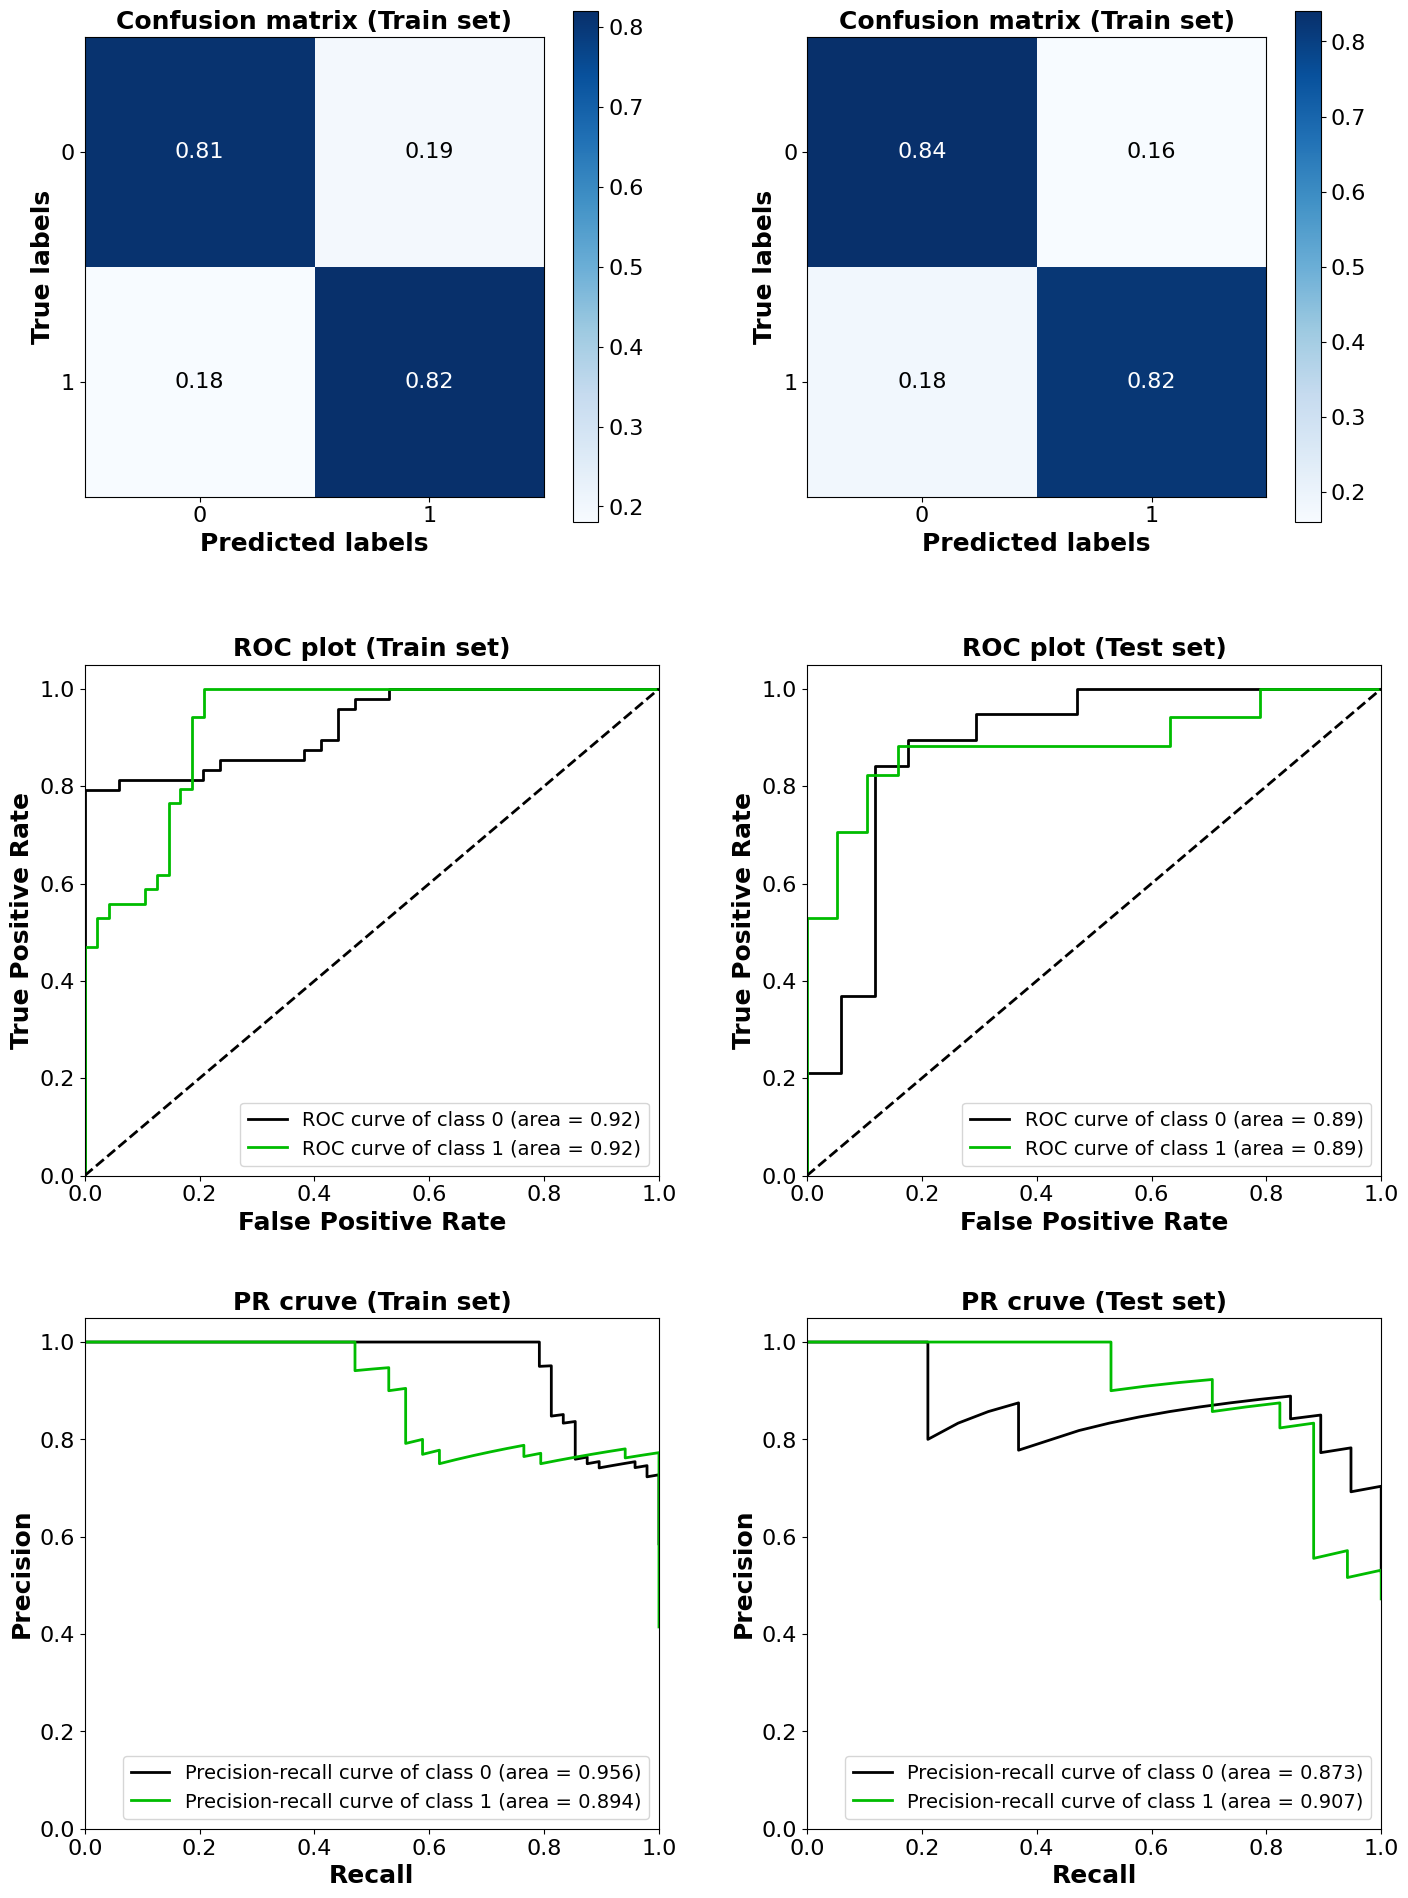

In [ ]:
### Visualizing RFC performance in training and testing sets
### for each prediction class (i.e, 0 and 1)
# Creating a 2-Dimensional subplot
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

### Plotting model performance on the training set
# Confusion matrix (Train set)
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True,
                                    ax=axes[0,0], text_fontsize=16)
axes[0,0].set_title("Confusion matrix (Train set)", fontsize=18,
                    fontweight="bold")
axes[0,0].set_xlabel("Predicted labels", fontsize=18, fontweight="bold")
axes[0,0].set_ylabel("True labels", fontsize=18, fontweight="bold")
axes[0,0].tick_params(axis="both", which="major", labelsize=16)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=16)

# ROC Curve (Train set)
skplt.metrics.plot_roc(y_train, y_proba_train, plot_micro=False,
                       plot_macro=False, ax=axes[1,0])
axes[1,0].set_title("ROC plot (Train set)", fontsize=18, fontweight="bold")
axes[1,0].set_xlabel("False Positive Rate", fontsize=18, fontweight="bold")
axes[1,0].set_ylabel("True Positive Rate", fontsize=18, fontweight="bold")
axes[1,0].tick_params(axis="both", which="major", labelsize=16)
axes[1,0].legend(loc="lower right", fontsize=14)

# PR Curve (Train set)
skplt.metrics.plot_precision_recall(y_train, y_proba_train, plot_micro=False,
                                    ax=axes[2,0])
axes[2,0].set_title("PR cruve (Train set)", fontsize=18, fontweight="bold")
axes[2,0].set_xlabel("Recall", fontsize=18, fontweight="bold")
axes[2,0].set_ylabel("Precision", fontsize=18, fontweight="bold")
axes[2,0].tick_params(axis="both", which="major", labelsize=16)
axes[2,0].legend(loc="lower right", fontsize=14)

### Plotting model performance on the testing set
# Confusion matrix (Test set)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True,
                                    ax=axes[0,1], text_fontsize=16)
axes[0,1].set_title("Confusion matrix (Train set)", fontsize=18,
                    fontweight="bold")
axes[0,1].set_xlabel("Predicted labels", fontsize=18, fontweight="bold")
axes[0,1].set_ylabel("True labels", fontsize=18, fontweight="bold")
axes[0,1].tick_params(axis="both", which="major", labelsize=16)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=16)

# ROC Curve (Test set)
skplt.metrics.plot_roc(y_test, y_proba_test, plot_micro=False, plot_macro=False,
                       ax=axes[1,1])
axes[1,1].set_title("ROC plot (Test set)", fontsize=18, fontweight="bold")
axes[1,1].set_xlabel("False Positive Rate", fontsize=18, fontweight="bold")
axes[1,1].set_ylabel("True Positive Rate", fontsize=18, fontweight="bold")
axes[1,1].tick_params(axis="both", which="major", labelsize=16)
axes[1,1].legend(loc="lower right", fontsize=14)

# PR Curve (Test set)
skplt.metrics.plot_precision_recall(y_test, y_proba_test, plot_micro=False,
                                    ax=axes[2,1])
axes[2,1].set_title("PR cruve (Test set)", fontsize=18, fontweight="bold")
axes[2,1].set_xlabel("Recall", fontsize=18, fontweight="bold")
axes[2,1].set_ylabel("Precision", fontsize=18, fontweight="bold")
axes[2,1].tick_params(axis="both", which="major", labelsize=16)
axes[2,1].legend(loc="lower right", fontsize=14)

# Adjust spacing between subplots
plt.tight_layout(pad=4)

# Hide empty subplots
for i in range(len(cols), len(axes.flatten())):
    axes.flatten()[i].axis("off")
    
# Export the plot
plt.savefig(file_path+"/figures/Figure_11.png", dpi=600, bbox_inches ="tight",
            pad_inches = 0.1, orientation ="landscape")

# Show the plot
plt.show()